# Cardiac Arrhythmia Multy-Class Classification 

Analyze data and address missing data if there is any. 

Decide aboute a good evaluation strategy and justify your choice. 

Find the best parameters for the following classification models: 
- KNN classifcation 
- Logistic Regression
- Linear Supprt Vector Machine
- Kerenilzed Support Vector Machine
- Decision Tree
- Random Forest 

Then use different bagging and boosting methods to boost the results? Do you see any significant change? Why or why not? 

Next, use data reduction method you have learned in class to reduce the size of data, and agian try above models. Do you get better results? Justify your answer. 

<font color = 'red'>Due date for full credit: April 4, 11:59 PM
    <br>
    Due date for partial credit: April 6, 11:59 PM.
    <br> No submission will be accepted after April 6. 
    <br> Please note that your term paper is also due April 6. 
    </font>

## 1. Summary of the project

We've analyzed the Cardiac Arrhytmia dataset and how we can predict a normal function vs and arrhytmia. The document is structured in:

###### 1) Summary of the project

###### 2) Retrieving packages and datasets

###### 3) Cleaning the data and exploratory data analysis
   In this section we've applied the following activities: Analyzed graphically the dataset, find variables with missing values, set index the "Date" variable, impute the data with the back fill method, define the X and y matrices after feature selection, apply the train_test_split function (considering the original dependent variable (multi class and a binarized variable) and scale the data.  

###### 4) Data modeling with all variables
   In this section we've applied Knearest Neighbors, Logistic Regression, Linear Suppor Vector Classifier, Kernelized Support Vector Classifier, Decision Tree and Random Forest.
   
   For every model we've applied gridsearchCV (If the model required parameters), apply the models with train and test datasets, and create some reports about the prediction (score, classification report, ROC curve).
   
###### 5) Bagging
   In this section we've applied Bagging for all models. To test the results we've analyzed with the function out of bag 

###### 6) Adaboosting
   In this section we've applied Adaboosting for all models
    
###### 7) Gradientboosting
   In this section we've applied Gradient Boosting based in Decision Tree.
    
###### 8) Voting Classifier
   In this section we've applied Voting Classifier.
    
###### 9) PCA
   In this section we've applied PCA for all models. The number of principal components used were 32 that get about 80% of the variance.
   
###### 10) Final comparison and conclusions
   For this section we've created table resumes for multiclass and binary class comparing all the models (original models, bagging, Adaboosting, PCA). 
   
   In multiclass classification, our best results are the PCA for linear SVC with 0.75 accuracy.
   
   In binary class classification, our best results are the PCA for kernelized SVC and Decision Tree with Bagging methods with 0.81 accuracy.


    
 

## 2. Retrieving packages and datasets

In [1]:
#Retrieving basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Retrieving skicit packages

#From skleanr preprocessing
from sklearn.preprocessing import MinMaxScaler

#For model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#For modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#For ensemble methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Dimension Reduction
from sklearn.decomposition import PCA

#For evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Dimension Reduction
from sklearn.decomposition import PCA


In [3]:
cardio=pd.read_csv("cardiac_arrhythmia.csv", header=None)

## 3. Data cleaning and exploratory analysis

In [4]:
cardio.shape

(452, 280)

In [5]:
cardio.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [6]:
cardio.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [7]:
#Counting the Classification
pd.pivot_table(cardio, values=2, index=279, aggfunc="count")

,2
279,
1,245
2,44
3,15
4,15
5,13
6,25
7,3
8,2
9,9


In [8]:
cardio[cardio[279]!=1].shape

(207, 280)

* We can see that the last column contains the class distribution code of arrytmia cases, where 245 instance are normal and the other 207 instances show a certain pattern of arrytmia
* Instances of classes 11, 12, and 13 do not exist in the current dataset

### 3.1 Transforming object types into numeric types

In [9]:
cardio.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
5        int64
6        int64
7        int64
8        int64
9        int64
10      object
11      object
12      object
13      object
14      object
15       int64
16       int64
17       int64
18       int64
19       int64
20       int64
21       int64
22       int64
23       int64
24       int64
25       int64
26       int64
27       int64
28       int64
29       int64
        ...   
250    float64
251    float64
252    float64
253    float64
254    float64
255    float64
256    float64
257    float64
258    float64
259    float64
260    float64
261    float64
262    float64
263    float64
264      int64
265    float64
266    float64
267    float64
268    float64
269    float64
270    float64
271    float64
272    float64
273    float64
274      int64
275    float64
276    float64
277    float64
278    float64
279      int64
Length: 280, dtype: object

In [10]:
#Identifying str columns
cardio_object=cardio.loc[:,cardio.dtypes=="object"]
cardio_object.head()

,10,11,12,13,14
0,13,64,-2,?,63
1,37,-17,31,?,53
2,34,70,66,23,75
3,11,-5,20,?,71
4,13,61,3,?,?


In [11]:
#Converting into numeric
cardio[10]=pd.to_numeric(cardio[10], errors="coerce")
cardio[11]=pd.to_numeric(cardio[11], errors="coerce")
cardio[12]=pd.to_numeric(cardio[12], errors="coerce")
cardio[13]=pd.to_numeric(cardio[13], errors="coerce")
cardio[14]=pd.to_numeric(cardio[14], errors="coerce")

In [12]:
cardio.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 280 columns):
0      452 non-null int64
1      452 non-null int64
2      452 non-null int64
3      452 non-null int64
4      452 non-null int64
5      452 non-null int64
6      452 non-null int64
7      452 non-null int64
8      452 non-null int64
9      452 non-null int64
10     444 non-null float64
11     430 non-null float64
12     451 non-null float64
13     76 non-null float64
14     451 non-null float64
15     452 non-null int64
16     452 non-null int64
17     452 non-null int64
18     452 non-null int64
19     452 non-null int64
20     452 non-null int64
21     452 non-null int64
22     452 non-null int64
23     452 non-null int64
24     452 non-null int64
25     452 non-null int64
26     452 non-null int64
27     452 non-null int64
28     452 non-null int64
29     452 non-null int64
30     452 non-null int64
31     452 non-null int64
32     452 non-null int64
33     452 non-null int64
3

In [13]:
cardio=cardio.loc[:,cardio.notnull().sum()>len(cardio)*0.95]
cardio.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 279 columns):
0      452 non-null int64
1      452 non-null int64
2      452 non-null int64
3      452 non-null int64
4      452 non-null int64
5      452 non-null int64
6      452 non-null int64
7      452 non-null int64
8      452 non-null int64
9      452 non-null int64
10     444 non-null float64
11     430 non-null float64
12     451 non-null float64
14     451 non-null float64
15     452 non-null int64
16     452 non-null int64
17     452 non-null int64
18     452 non-null int64
19     452 non-null int64
20     452 non-null int64
21     452 non-null int64
22     452 non-null int64
23     452 non-null int64
24     452 non-null int64
25     452 non-null int64
26     452 non-null int64
27     452 non-null int64
28     452 non-null int64
29     452 non-null int64
30     452 non-null int64
31     452 non-null int64
32     452 non-null int64
33     452 non-null int64
34     452 non-null int64
35

### 3.2 Filling the missing values

In [14]:
cardio=cardio.fillna(method="backfill")

### 3.3 Defining the X, y matrices

#### Creating a binary variable

In [15]:
def sano(c):
    if c[279]==1:
        return 1
    else:
        return 0

In [16]:
cardio_binary=cardio.copy()
cardio_binary[279]=cardio_binary.apply(sano, axis=1)
cardio_binary.head(10)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,0
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,0
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,0
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,0
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1,0
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0,0.8,0.9,20.1,25.1,0


##### Creating the X and y matrices

* Multi-class

In [17]:
X=cardio.loc[:,0:278]
y=cardio.loc[:,279:280]

* Binary class

In [18]:
X_binary=cardio_binary.loc[:,0:278]
y_binary=cardio_binary.loc[:,279:280]

### 3.4 Train test split

* Multi-class

In [19]:
Xtrain, Xtest, ytrain,ytest=train_test_split(X, y, random_state=30, test_size=0.2)

In [20]:
print("The shape of x is: ", X.shape)
print("The shape of xtrain is: ", Xtrain.shape)
print("The shape of ytrain is: ", ytrain.shape)
print("The shape of xtest is: ", Xtest.shape)
print("The shape of ytest is: ", ytest.shape)

The shape of x is:  (452, 278)
The shape of xtrain is:  (361, 278)
The shape of ytrain is:  (361, 1)
The shape of xtest is:  (91, 278)
The shape of ytest is:  (91, 1)


* Binary class

In [21]:
Xtrain_binary, Xtest_binary, ytrain_binary,ytest_binary = train_test_split(X_binary, y_binary, random_state=30, test_size=0.2)

In [22]:
print("The shape of x is: ", X_binary.shape)
print("The shape of xtrain is: ", Xtrain_binary.shape)
print("The shape of ytrain is: ", ytrain_binary.shape)
print("The shape of xtest is: ", Xtest_binary.shape)
print("The shape of ytest is: ", ytest_binary.shape)

The shape of x is:  (452, 278)
The shape of xtrain is:  (361, 278)
The shape of ytrain is:  (361, 1)
The shape of xtest is:  (91, 278)
The shape of ytest is:  (91, 1)


### 3.5 Data scaling

* Multi-class

In [23]:
#Scaling the dataframe
minmax=MinMaxScaler()
Xtrain_mms=minmax.fit_transform(Xtrain)
Xtest_mms=minmax.transform(Xtest)

* Binary class

In [24]:
#Scaling the dataframe
minmax2=MinMaxScaler()
Xtrain_binary_mms=minmax2.fit_transform(Xtrain_binary)
Xtest_binary_mms=minmax2.transform(Xtest_binary)

## 4. Modelling with all variables

### 4.1 Knearest Neighbor Classifier

### 4.1.1 Multiclass K-NN

#### Grid Search for Multiclass-knn

In [25]:
#Tuning Hyperparameters
neighbors=[i for i in range(1, 15, 2)]
knearest_grid=KNeighborsClassifier()
kparam_grid={"n_neighbors":neighbors}
grid_Kneighbors=GridSearchCV(knearest_grid, kparam_grid, cv=5, scoring= 'accuracy')

#Fitting
grid_Kneighbors.fit(Xtrain_mms, ytrain)

#Printing reports
print("Best K: {}".format(grid_Kneighbors.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_Kneighbors.best_score_))
print("Best estimator:\n{}".format(grid_Kneighbors.best_estimator_))

Best K: {'n_neighbors': 3}
Best cross-validation Accuracy: 0.5762
Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


#### K-NN multiclass model with best parameters

In [26]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain_mms, ytrain)
yknn_test_predict=knn.predict(Xtest_mms)

print('Accuracy(Train): {:.4f}'.format(knn.score(Xtrain_mms, ytrain)))
print('Accuracy(Test): {:.4f}'.format(knn.score(Xtest_mms, ytest)))
print(classification_report(ytest, yknn_test_predict))


Accuracy(Train): 0.6704
Accuracy(Test): 0.6264
             precision    recall  f1-score   support

          1       0.63      0.98      0.77        55
          2       0.00      0.00      0.00        11
          3       1.00      0.67      0.80         3
          4       1.00      0.33      0.50         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.45      0.63      0.51        91



### 4.1.2 Binary class K-NN

#### Grid Search for Binary class-knn

In [27]:
#Tuning Hyperparameters
neighbors=[i for i in range(1, 15, 2)]
knearest_grid=KNeighborsClassifier()
kparam_grid={"n_neighbors":neighbors}
grid_Kneighbors=GridSearchCV(knearest_grid, kparam_grid, cv=5, scoring= 'accuracy')

#Fitting
grid_Kneighbors.fit(Xtrain_binary_mms, ytrain_binary)

#Printing reports
print("Best K: {}".format(grid_Kneighbors.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_Kneighbors.best_score_))
print("Best estimator:\n{}".format(grid_Kneighbors.best_estimator_))

Best K: {'n_neighbors': 5}
Best cross-validation Accuracy: 0.6233
Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


#### K-NN binary class model with best parameters

In [28]:
knn_binary=KNeighborsClassifier(n_neighbors=5)
knn_binary.fit(Xtrain_mms, ytrain_binary)
yknn_test_binary_predict=knn_binary.predict(Xtest_binary_mms)


print('Accuracy(Train): {:.4f}'.format(knn_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy(Test): {:.4f}'.format(knn_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, yknn_test_binary_predict))


Accuracy(Train): 0.7258
Accuracy(Test): 0.6154
             precision    recall  f1-score   support

          0       0.55      0.17      0.26        36
          1       0.62      0.91      0.74        55

avg / total       0.59      0.62      0.55        91



### 4.2 Logistic Regression

### 4.2.1 Multiclass Logistic Regression

#### Grid Search for Multi class-logit

In [29]:
#Setting the parameters
aux_logistic=LogisticRegression(multi_class='multinomial')
logitparam={"C":[0.1,1,5,10,15,20],
            'solver': ['lbfgs', 'sag' ,'newton-cg']}
grid_logit=GridSearchCV(aux_logistic, logitparam, cv=5)

#Fitting
grid_logit.fit(Xtrain_mms, ytrain)

#Printing reports
print("Best K: {}".format(grid_logit.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_logit.best_score_))
print("Best estimator:\n{}".format(grid_logit.best_estimator_))

Best K: {'C': 10, 'solver': 'lbfgs'}
Best cross-validation Accuracy: 0.7036
Best estimator:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


#### Logit multiclass model with best parameters

In [30]:
logistic=LogisticRegression(C=20, solver='lbfgs')
logistic.fit(Xtrain_mms, ytrain)
ylogit_test_predict=logistic.predict(Xtest_mms)

print('Accuracy (Train): {:.4f}'.format(logistic.score(Xtrain_mms, ytrain)))
print('Accuracy(Test): {:.4f}'.format(logistic.score(Xtest_mms, ytest)))
print(classification_report(ytest, ylogit_test_predict))

Accuracy (Train): 0.9640
Accuracy(Test): 0.7033
             precision    recall  f1-score   support

          1       0.77      0.87      0.82        55
          2       0.45      0.45      0.45        11
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      0.67      0.80         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         10       0.44      0.80      0.57         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.65      0.70      0.67        91



### 4.2.2 Binary Class Logistic Regression

#### Grid Search for Binary class-logit

In [31]:
#Setting the parameters
aux_logistic=LogisticRegression()
logitparam={"C":[0.1,1,5,10,15,20]}
grid_logit=GridSearchCV(aux_logistic, logitparam, cv=5)

#Fitting
grid_logit.fit(Xtrain_binary_mms, ytrain_binary)

#Printing reports
print("Best K: {}".format(grid_logit.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_logit.best_score_))
print("Best estimator:\n{}".format(grid_logit.best_estimator_))

Best K: {'C': 1}
Best cross-validation Accuracy: 0.7507
Best estimator:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


#### Logit binary class model with best parameters

In [32]:
logistic_binary=LogisticRegression(C=1)
logistic_binary.fit(Xtrain_binary_mms, ytrain_binary)
ylogit_test_binary_predict=logistic_binary.predict(Xtest_binary_mms)

print('Accuracy (Train): {:.4f}'.format(logistic_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy(Test): {:.4f}'.format(logistic_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, ylogit_test_binary_predict))


Accuracy (Train): 0.8615
Accuracy(Test): 0.7363
             precision    recall  f1-score   support

          0       0.69      0.61      0.65        36
          1       0.76      0.82      0.79        55

avg / total       0.73      0.74      0.73        91



### 4.3 Linear Support Vector Machine

### 4.3.1 Multiclass Linear Support Vector Machine

#### Grid Search for Multi class-linear SVC

In [33]:
#Setting the parameters
aux_linearSVC=SVC(kernel = "linear")
linearSVCparam={"C":[1,10,100,1000],
               "gamma":[0.01, 0.1, 0.5, 1]}
grid_linearSVC=GridSearchCV(aux_linearSVC, linearSVCparam, cv=5)

#Fitting
grid_linearSVC.fit(Xtrain_mms, ytrain)

#Print reports
print("Best K: {}".format(grid_linearSVC.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_linearSVC.best_score_))
print("Best estimator:\n{}".format(grid_linearSVC.best_estimator_))

Best K: {'C': 1, 'gamma': 0.01}
Best cross-validation Accuracy: 0.7230
Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Linear SVC multiclass model with best parameters

In [34]:
linearSVC=SVC(C=1, gamma=0.01, kernel="linear")
linearSVC.fit(Xtrain_mms, ytrain)

ylinearSVC_test_predict=linearSVC.predict(Xtest_mms)

print('Accuracy (Train): {:.4f}'.format(linearSVC.score(Xtrain_mms, ytrain)))
print('Accuracy(Test): {:.4f}'.format(linearSVC.score(Xtest_mms, ytest)))
print(classification_report(ytest, ylinearSVC_test_predict))

Accuracy (Train): 0.9058
Accuracy(Test): 0.7143
             precision    recall  f1-score   support

          1       0.77      0.87      0.82        55
          2       0.42      0.45      0.43        11
          3       1.00      1.00      1.00         3
          4       1.00      1.00      1.00         3
          5       1.00      0.67      0.80         3
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         1
         10       0.43      0.60      0.50         5
         14       1.00      0.50      0.67         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.66      0.71      0.68        91



### 4.3.2 Binary Class Linear SVC

#### Grid Search for Binary class-linear SVC

In [35]:
#Setting the parameters
aux_linearSVC=SVC()
linearSVCparam={"kernel":["linear"],
               "C":[1,10,100,1000],
               "gamma":[0.01, 0.1, 0.5, 1]}
grid_linearSVC=GridSearchCV(aux_linearSVC, linearSVCparam, cv=5)

#Fitting
grid_linearSVC.fit(Xtrain_binary_mms, ytrain_binary)

#Print reports
print("Best K: {}".format(grid_linearSVC.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_linearSVC.best_score_))
print("Best estimator:\n{}".format(grid_linearSVC.best_estimator_))

Best K: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best cross-validation Accuracy: 0.7756
Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Linear SVC binary class model with best parameters

In [36]:
linearSVC_binary=SVC(C=1, gamma=0.01, kernel="linear")
linearSVC_binary.fit(Xtrain_binary_mms, ytrain_binary)


ylinearSVC_test_binary_predict=linearSVC_binary.predict(Xtest_binary_mms)

print('Accuracy(Train): {:.4f}'.format(linearSVC_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy(Test): {:.4f}'.format(linearSVC_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, ylinearSVC_test_binary_predict))


Accuracy(Train): 0.8892
Accuracy(Test): 0.7253
             precision    recall  f1-score   support

          0       0.68      0.58      0.63        36
          1       0.75      0.82      0.78        55

avg / total       0.72      0.73      0.72        91



### 4.4 Kernelized Support Vector Machine

### 4.4.1 Multiclass Kernelized Support Vector Machine

#### Grid Search for Multi class-kernelized SVC

In [37]:
#Setting the parameters
aux_kernelizedSVC=SVC()
kernelizedSVCparam={"kernel":["rbf", "poly"],
               "C":[1,10,100,1000],
               "gamma":[0.01, 0.1, 0.5, 1]}
grid_kernelizedSVC=GridSearchCV(aux_kernelizedSVC, kernelizedSVCparam, cv=5)

#Fitting
grid_kernelizedSVC.fit(Xtrain_mms, ytrain)

#Print reports
print("Best K: {}".format(grid_kernelizedSVC.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_kernelizedSVC.best_score_))
print("Best estimator:\n{}".format(grid_kernelizedSVC.best_estimator_))

Best K: {'C': 100, 'gamma': 0.01, 'kernel': 'poly'}
Best cross-validation Accuracy: 0.7202
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Kernelized SVC multiclass model with best parameters

In [38]:
kernelizedSVC=SVC(C=100, gamma=0.01, kernel='poly')
kernelizedSVC.fit(Xtrain_mms, ytrain)


ykernelizedSVC_test_predict=kernelizedSVC.predict(Xtest_mms)

print('Accuracy(Train): {:.4f}'.format(kernelizedSVC.score(Xtrain_mms, ytrain)))
print('Accuracy(Test): {:.4f}'.format(kernelizedSVC.score(Xtest_mms, ytest)))
print(classification_report(ytest, ykernelizedSVC_test_predict))



Accuracy(Train): 0.9224
Accuracy(Test): 0.7253
             precision    recall  f1-score   support

          1       0.79      0.89      0.84        55
          2       0.46      0.55      0.50        11
          3       1.00      1.00      1.00         3
          4       1.00      1.00      1.00         3
          5       1.00      0.67      0.80         3
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         1
         10       0.43      0.60      0.50         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.66      0.73      0.69        91



### 4.4.2 Binary Class Kernelized SVC

#### Grid Search for Binary class-kernelizedSVC

In [39]:
#Setting the parameters
aux_kernelizedSVC=SVC()
kernelizedSVCparam={"kernel":["rbf", "poly"],
               "C":[1,10,100,1000],
               "gamma":[0.01, 0.1, 0.5, 1]}
grid_kernelizedSVC=GridSearchCV(aux_kernelizedSVC, kernelizedSVCparam, cv=5)

#Fitting
grid_kernelizedSVC.fit(Xtrain_binary_mms, ytrain_binary)

#Print reports
print("Best K: {}".format(grid_kernelizedSVC.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_kernelizedSVC.best_score_))
print("Best estimator:\n{}".format(grid_kernelizedSVC.best_estimator_))

Best K: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation Accuracy: 0.7645
Best estimator:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Kernelized SVC binary class model with best parameters

In [40]:
kernelizedSVC_binary=SVC(C=10, gamma=0.01, kernel="rbf")
kernelizedSVC_binary.fit(Xtrain_binary_mms, ytrain_binary)

ykernelizedSVC_test_binary_predict=linearSVC_binary.predict(Xtest_binary_mms)

print('Accuracy(Train): {:.4f}'.format(kernelizedSVC_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy(Test): {:.4f}'.format(kernelizedSVC_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, ykernelizedSVC_test_binary_predict))


Accuracy(Train): 0.8393
Accuracy(Test): 0.7582
             precision    recall  f1-score   support

          0       0.68      0.58      0.63        36
          1       0.75      0.82      0.78        55

avg / total       0.72      0.73      0.72        91



### 4.5 Decision Tree

### 4.5.1 Multiclass DecisionTree

#### Grid Search for Multi class-Decision Tree

In [41]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

In [42]:
#Setting the parameters
aux_tree=DecisionTreeClassifier()
treeparam={"max_depth":max_depths,
          'min_samples_split':min_samples_splits}
grid_tree=GridSearchCV(aux_tree, treeparam, cv=5)

#Fitting
grid_tree.fit(Xtrain_mms, ytrain)

#Print reports
print("Best K: {}".format(grid_tree.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_tree.best_score_))
print("Best estimator:\n{}".format(grid_tree.best_estimator_))

Best K: {'max_depth': 6.0, 'min_samples_split': 0.10000000000000001}
Best cross-validation Accuracy: 0.7008
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.10000000000000001,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### Decision Tree multiclass model with best parameters

In [43]:
tree=DecisionTreeClassifier(max_depth=12, min_samples_split=0.1)
tree.fit(Xtrain_mms, ytrain)


ytree_test_predict=tree.predict(Xtest_mms)


print('Accuracy(Train): {:.4f}'.format(tree.score(Xtrain_mms, ytrain)))
print('Accuracy(Test): {:.4f}'.format(tree.score(Xtest_mms, ytest)))
print(classification_report(ytest, ytree_test_predict))





Accuracy(Train): 0.7978
Accuracy(Test): 0.6154
             precision    recall  f1-score   support

          1       0.86      0.76      0.81        55
          2       0.31      0.45      0.37        11
          3       0.00      0.00      0.00         3
          4       0.60      1.00      0.75         3
          5       1.00      0.33      0.50         3
          6       0.67      1.00      0.80         2
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         0
         10       0.19      0.60      0.29         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.63      0.62      0.61        91



### 4.5.2 Binary Class Decision Tree

#### Grid Search for Binary class-Decision Tree

In [44]:
#Setting the parameters
aux_tree=DecisionTreeClassifier()
treeparam={"max_depth":max_depths,
          'min_samples_split':min_samples_splits}
grid_tree=GridSearchCV(aux_tree, treeparam, cv=5)

#Fitting
grid_tree.fit(Xtrain_binary_mms, ytrain_binary)

#Print reports
print("Best K: {}".format(grid_tree.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_tree.best_score_))
print("Best estimator:\n{}".format(grid_tree.best_estimator_))

Best K: {'max_depth': 12.0, 'min_samples_split': 0.10000000000000001}
Best cross-validation Accuracy: 0.8172
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.10000000000000001,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### Decision tree binary class model with best parameters

In [45]:
tree_binary=DecisionTreeClassifier(max_depth=29, min_samples_split=0.1)
tree_binary.fit(Xtrain_mms, ytrain_binary)

ytree_binary_test_predict=tree_binary.predict(Xtest_binary_mms)


print('Accuracy(Train): {:.4f}'.format(tree_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy(Test): {:.4f}'.format(tree_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, ytree_binary_test_predict))


Accuracy(Train): 0.9307
Accuracy(Test): 0.7692
             precision    recall  f1-score   support

          0       0.66      0.86      0.75        36
          1       0.89      0.71      0.79        55

avg / total       0.80      0.77      0.77        91



### 4.6 Random Forest

### 4.6.1 Multiclass Random Forest

#### Grid Search for Multi class-Random Forest

In [46]:
#Setting the parameters
aux_randomforest=RandomForestClassifier()
randomforestparam={"n_estimators":[10,20,30,50],
           "max_depth":[5, 10,15,20]}
grid_randomforest=GridSearchCV(aux_randomforest, randomforestparam, cv=5)

#Fitting
grid_randomforest.fit(Xtrain_mms, ytrain)

#Print reports
print("Best K: {}".format(grid_randomforest.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_randomforest.best_score_))
print("Best estimator:\n{}".format(grid_randomforest.best_estimator_))

Best K: {'max_depth': 15, 'n_estimators': 30}
Best cross-validation Accuracy: 0.7341
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### Random Forest multiclass model with best parameters

In [47]:
randomforest=RandomForestClassifier(max_depth=20, n_estimators=30)
randomforest.fit(Xtrain_mms, ytrain)


yrandomforest_test_predict=tree.predict(Xtest_mms)


print('Accuracy (Train): {:.4f}'.format(randomforest.score(Xtrain_mms, ytrain)))
print('Accuracy(Test): {:.4f}'.format(randomforest.score(Xtest_mms, ytest)))
print(classification_report(ytest, yrandomforest_test_predict))





Accuracy (Train): 1.0000
Accuracy(Test): 0.7253
             precision    recall  f1-score   support

          1       0.86      0.76      0.81        55
          2       0.31      0.45      0.37        11
          3       0.00      0.00      0.00         3
          4       0.60      1.00      0.75         3
          5       1.00      0.33      0.50         3
          6       0.67      1.00      0.80         2
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         0
         10       0.19      0.60      0.29         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.63      0.62      0.61        91



### 4.6.2 Binary Class Random Forest

#### Grid Search for Binary class-Random Forest

In [48]:
#Setting the parameters
aux_randomforest=RandomForestClassifier(random_state= 10)
randomforestparam={"n_estimators":[10,20,30,50],
           "max_depth":[5, 10,15,20]}
grid_randomforest=GridSearchCV(aux_randomforest, randomforestparam, cv=5)

#Fitting
grid_randomforest.fit(Xtrain_binary_mms, ytrain_binary)

#Print reports
print("Best K: {}".format(grid_randomforest.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_randomforest.best_score_))
print("Best estimator:\n{}".format(grid_randomforest.best_estimator_))

Best K: {'max_depth': 10, 'n_estimators': 30}
Best cross-validation Accuracy: 0.8006
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


#### Random Forest binary class model with best parameters

In [49]:
randomforest_binary=RandomForestClassifier(max_depth=10, n_estimators=30)
randomforest_binary.fit(Xtrain_binary_mms, ytrain_binary)


yrandomforest_binary_test_predict=randomforest_binary.predict(Xtest_mms)


print('Accuracy (Train): {:.4f}'.format(randomforest_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy(Test): {:.4f}'.format(randomforest_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, yrandomforest_binary_test_predict))





Accuracy (Train): 0.9751
Accuracy(Test): 0.8132
             precision    recall  f1-score   support

          0       0.76      0.78      0.77        36
          1       0.85      0.84      0.84        55

avg / total       0.81      0.81      0.81        91



### 4.7 Model Comparation

### 4.7.1 Multi Class comparison

In [50]:
models=[]
models.append(('KNN', knn))
models.append(('Logistic', logistic))
models.append(('Simple Support Vector Classification', linearSVC))
models.append(('Kernelized Support Vector Classification', kernelizedSVC))
models.append(('Decision Tree', tree))
models.append(('Random Forest', randomforest))


KNN accuracy : 0.6264
Logistic accuracy : 0.7033
Simple Support Vector Classification accuracy : 0.7143
Kernelized Support Vector Classification accuracy : 0.7253
Decision Tree accuracy : 0.6154
Random Forest accuracy : 0.7253


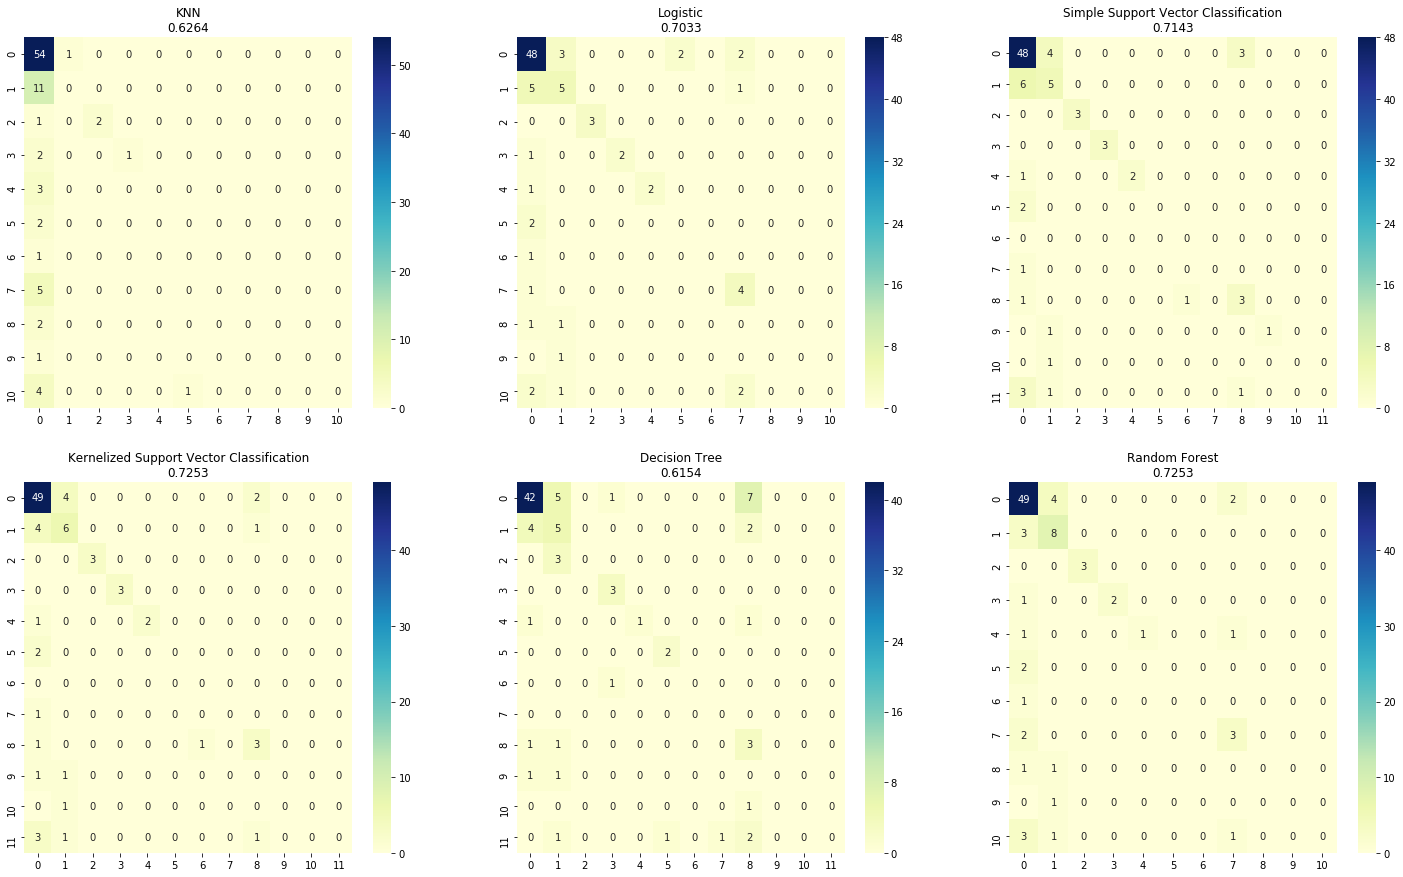

In [51]:
fig, ax = plt.subplots(2, 3, figsize=(25,15))
ax = ax.flatten()
i=0
simple_multi=[]
for name, model in models:
    predicted=model.predict(Xtest_mms)
    title=name+'\n{:.4f}'.format(model.score(Xtest_mms, ytest))
    print(name+' accuracy : {:.4f}'.format(model.score(Xtest_mms, ytest)))
    a=confusion_matrix(ytest, predicted)
    df_cm = pd.DataFrame(a)
    sns.heatmap(a, annot=True, fmt="d", ax=ax[i], cmap="YlGnBu")
    ax[i].set_title(title)
    #list
    simple_multi.append(model.score(Xtest_mms, ytest))
    i=i+1

#### Kernelized Support Vector Classifier performances better ( accuracy : 72.53%)

### 4.7.2 Binary class comparison

In [52]:
models_binary=[]
models_binary.append(('KNN', knn_binary))
models_binary.append(('Logistic', logistic_binary))
models_binary.append(('Simple Support Vector Classification', linearSVC_binary))
models_binary.append(('Kernelized Support Vector Classification', kernelizedSVC_binary))
models_binary.append(('Decision Tree', tree_binary))
models_binary.append(('Random Forest', randomforest_binary))

KNN AUC: 0.5379
Logistic AUC: 0.7146
Simple Support Vector Classification AUC: 0.7008
Kernelized Support Vector Classification AUC: 0.7328
Decision Tree AUC: 0.7851
Random Forest AUC: 0.8071


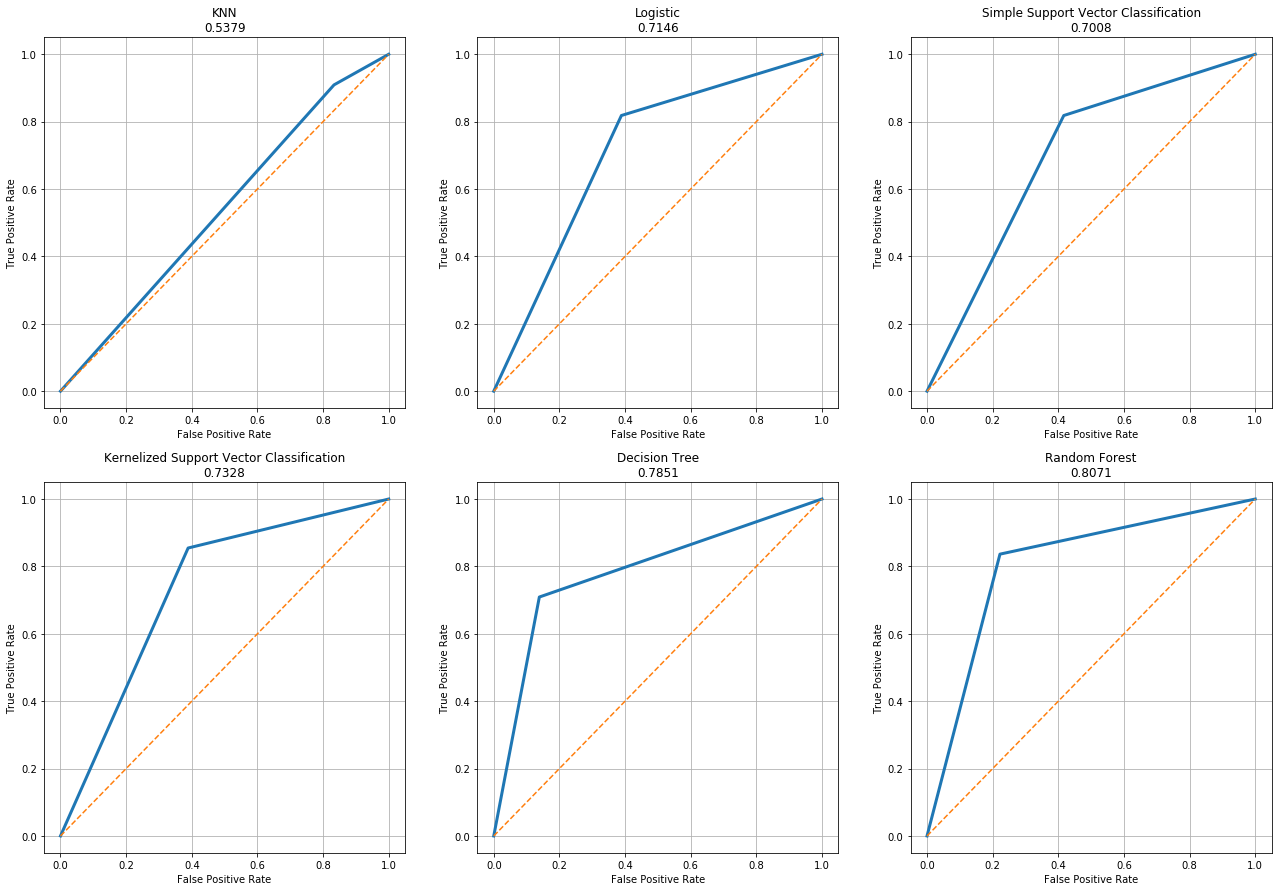

In [53]:
fig, ax = plt.subplots(2, 3, figsize=(22,15))
ax = ax.flatten()
i=0
simple_binary=[]
for name, model in models_binary:
    predicted=model.predict(Xtest_binary_mms)
    fpr, tpr,_=roc_curve(ytest_binary, predicted)
    roc=auc(fpr, tpr)
    #list
    simple_binary.append(model.score(Xtest_mms, ytest_binary))
    print(name, 'AUC: {:.4f}'.format(roc))
    title=name+'\n{:.4f}'.format(roc)
    ax[i].plot(fpr, tpr, lw=3)
    ax[i].plot([0, 1], [0, 1],linestyle='--')
    ax[i].grid(True)
    ax[i].set_title(title)
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    i=i+1

#### Random Forest performance better with binary dataset (AUC: 0.7889)

## 5. Bagging

In [54]:
#Scaling the dataframe
minmax3=MinMaxScaler()
Xbag_mms=minmax3.fit_transform(X)

In [55]:
bagging_milti_train=[]
bagging_milti_test=[]

In [56]:
bagging_binary_train=[]
bagging_binary_test=[]

### 5.1 Bagging Knearest Neighborhs

### 5.1 Bagging Multi class KNN

In [57]:
bag_knn=BaggingClassifier(base_estimator=knn, n_estimators=10, bootstrap=True, 
                          random_state=10)
bag_knn.fit(Xbag_mms, y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=10, verbose=0, warm_start=False)

In [58]:
bagging_milti_train.append(bag_knn.score(Xbag_mms, y))
bagging_milti_test.append(bag_knn.oob_score)
print("bag_knn multiclass all data: {:.4f}".format(bag_knn.score(Xbag_mms, y)))
print("bag_knn multiclass out of bag: ", bag_knn.oob_score)

bag_knn multiclass all data: 0.7279
bag_knn multiclass out of bag:  False


### 5.2  Binary class KNN

In [59]:
bag_knn_binary=BaggingClassifier(base_estimator=knn_binary, n_estimators=10, bootstrap=True,
                                 oob_score=True, random_state=10)
bag_knn_binary.fit(Xbag_mms, y_binary)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [60]:
bagging_binary_train.append(bag_knn_binary.score(Xbag_mms, y_binary))
bagging_binary_test.append(bag_knn_binary.oob_score_)

In [61]:
print("bag_knn binary all data: {:.4f}".format(bag_knn_binary.score(Xbag_mms, y_binary)))
print("bag_knn binary out of bag: {:.4f}".format(bag_knn_binary.oob_score_))

bag_knn binary all data: 0.7190
bag_knn binary out of bag: 0.6150


### 5.2 Bagging Logistic

### 5.2.1 Bagging Multi Class Logistic

In [62]:
bag_logit=BaggingClassifier(base_estimator=logistic, n_estimators=10, bootstrap=True,
                           oob_score=True, random_state=10)
bag_logit.fit(Xbag_mms, y)

BaggingClassifier(base_estimator=LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [63]:
bagging_milti_train.append(bag_logit.score(Xbag_mms, y))
bagging_milti_test.append(bag_logit.oob_score_)
print("bag_logit multiclass all data: {:.4f}".format(bag_logit.score(Xbag_mms, y)))
print("bag_logit multiclass out of bag: {:.4f}".format(bag_logit.oob_score_))

bag_logit multiclass all data: 0.9049
bag_logit multiclass out of bag: 0.6947


### 5.2.2 Bagging Binary Class Logistic

In [64]:
bag_logit_binary=BaggingClassifier(base_estimator=logistic_binary, n_estimators=10,
                                   bootstrap=True, oob_score=True, random_state=10)
bag_logit_binary.fit(Xbag_mms, y_binary)

BaggingClassifier(base_estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [65]:
bagging_binary_train.append(bag_logit_binary.score(Xbag_mms, y_binary))
bagging_binary_test.append(bag_logit_binary.oob_score_)

print("bag_knn binary all data: {:.4f}".format(bag_logit_binary.score(Xbag_mms, y_binary)))
print("bag_knn binary out of bag: {:.4f}".format(bag_logit_binary.oob_score_))

bag_knn binary all data: 0.8496
bag_knn binary out of bag: 0.7588


### 5.3 Bagging Linear SVC

### 5.3.1 Bagging Multi Class LinearSVC

In [66]:
bag_linearSVC=BaggingClassifier(base_estimator=linearSVC, n_estimators=10, bootstrap=True,
                               oob_score=True, random_state=10)
bag_linearSVC.fit(Xbag_mms, y)

BaggingClassifier(base_estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [67]:
bagging_milti_train.append(bag_linearSVC.score(Xbag_mms, y))
bagging_milti_test.append(bag_linearSVC.oob_score_)
print("bag_knn multiclass all data: {:.4f}".format(bag_linearSVC.score(Xbag_mms, y)))
print("bag_knn multiclass out of bag: {:.4f}".format(bag_linearSVC.oob_score_))

bag_knn multiclass all data: 0.8739
bag_knn multiclass out of bag: 0.6704


### 5.3.2 Bagging Binary Class LinearSVC

In [68]:
bag_linearSVC_binary=BaggingClassifier(base_estimator=linearSVC_binary, n_estimators=10, bootstrap=True,
                                      oob_score=True, random_state=10)
bag_linearSVC_binary.fit(Xbag_mms, y)

BaggingClassifier(base_estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [69]:
bagging_binary_train.append(bag_linearSVC_binary.score(Xbag_mms, y_binary))
bagging_binary_test.append(bag_linearSVC_binary.oob_score_)
print("bag_knn binary all data: {:.4f}".format(bag_linearSVC_binary.score(Xbag_mms, y_binary)))
print("bag_knn binary out of bag: {:.4f}".format(bag_linearSVC_binary.oob_score_))

bag_knn binary all data: 0.5332
bag_knn binary out of bag: 0.6704


### 5.4 Bagging Kernelized SVC

### 5.4.1 Bagging Multi Class KernelizedSVC

In [70]:
bag_kernelizedSVC=BaggingClassifier(base_estimator=kernelizedSVC, n_estimators=10, bootstrap=True,
                                   oob_score=True, random_state=10)
bag_kernelizedSVC.fit(Xbag_mms, y)

BaggingClassifier(base_estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [71]:
bagging_milti_train.append(bag_kernelizedSVC.score(Xbag_mms, y))
bagging_milti_test.append(bag_kernelizedSVC.oob_score_)
print("bag_knn multiclass all data: {:.4f}".format(bag_kernelizedSVC.score(Xbag_mms, y)))
print("bag_knn multiclass out of bag: {:.4f}".format(bag_kernelizedSVC.oob_score_))

bag_knn multiclass all data: 0.8850
bag_knn multiclass out of bag: 0.6770


### 5.4.2 Bagging Binary Class KernelizedSVC

In [72]:
bag_kernelizedSVC_binary=BaggingClassifier(base_estimator=kernelizedSVC_binary, n_estimators=10, bootstrap=True,
                                          oob_score=True, random_state=10)
bag_kernelizedSVC_binary.fit(Xbag_mms, y_binary)

BaggingClassifier(base_estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [73]:
bagging_binary_train.append(bag_kernelizedSVC_binary.score(Xbag_mms, y_binary))
bagging_binary_test.append(bag_kernelizedSVC_binary.oob_score_)
print("bag_knn binary all data: {:.4f}".format(bag_kernelizedSVC_binary.score(Xbag_mms, y_binary)))
print("bag_knn binary out of bag: {:.4f}".format(bag_kernelizedSVC_binary.oob_score_))

bag_knn binary all data: 0.8407
bag_knn binary out of bag: 0.7721


### 5.5 Bagging Decision Tree

### 5.5.1 Bagging Multi Class DecisionTree

In [74]:
bag_DecisionTree=BaggingClassifier(base_estimator=tree, 
                                   n_estimators=10, bootstrap=True, oob_score=True, random_state=10)
bag_DecisionTree.fit(Xbag_mms, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [75]:
bagging_milti_train.append(bag_DecisionTree.score(Xbag_mms, y))
bagging_milti_test.append(bag_DecisionTree.oob_score_)
print("bag_knn multiclass all data: {:.4f}".format(bag_DecisionTree.score(Xbag_mms, y)))
print("bag_knn multiclass out of bag: {:.4f}".format(bag_DecisionTree.oob_score_))

bag_knn multiclass all data: 0.7942
bag_knn multiclass out of bag: 0.6991


### 5.5.2 Bagging Binary Class DecisionTree

In [76]:
bag_DecisionTree_binary=BaggingClassifier(base_estimator=tree_binary,
                                          n_estimators=10, bootstrap=True, random_state=10, oob_score =True)
bag_DecisionTree_binary.fit(Xbag_mms, y_binary)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [77]:
bagging_binary_train.append(bag_DecisionTree_binary.score(Xbag_mms, y_binary))
bagging_binary_test.append(bag_DecisionTree_binary.oob_score_)
print("bag_knn binary all data: {:.4f}".format(bag_DecisionTree_binary.score(Xbag_mms, y_binary)))
print("bag_knn binary out of bag: {:.4f}".format(bag_DecisionTree_binary.oob_score_))

bag_knn binary all data: 0.9358
bag_knn binary out of bag: 0.8053


### 5.6 Bagging Random Forest

### 5.6.1 Bagging Multi Class Random Forest

In [78]:
bag_randomforest=BaggingClassifier(base_estimator=randomforest,
                                   n_estimators=10, 
                                   bootstrap=True, oob_score=True, random_state=10)
bag_randomforest.fit(Xtrain_mms, ytrain)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [79]:
bagging_milti_train.append(bag_randomforest.score(Xbag_mms, y))
bagging_milti_test.append(bag_randomforest.oob_score_)
print("bag_knn multiclass all data: {:.4f}".format(bag_randomforest.score(Xbag_mms, y)))
print("bag_knn multiclass out of bag: {:.4f}".format(bag_randomforest.oob_score_))

bag_knn multiclass all data: 0.8894
bag_knn multiclass out of bag: 0.6870


### 5.6.2 Bagging Binary Class Random Forest

In [80]:
bag_randomforest_binary=BaggingClassifier(base_estimator= randomforest_binary, n_estimators=10, 
                                          bootstrap=True, oob_score=True, random_state=10)
bag_randomforest_binary.fit(Xbag_mms, y_binary)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=10, verbose=0, warm_start=False)

In [81]:
bagging_binary_train.append(bag_randomforest_binary.score(Xbag_mms, y_binary))
bagging_binary_test.append(bag_randomforest_binary.oob_score_)
print("bag_knn binary all data: {:.4f}".format(bag_randomforest_binary.score(Xbag_mms, y_binary)))
print("bag_knn binary out of bag: {:.4f}".format(bag_randomforest_binary.oob_score_))

bag_knn binary all data: 0.9712
bag_knn binary out of bag: 0.7876


### 5.7 Bagging Model Comparation

### 5.7.1 Comparison  Multi class Bagging

In [82]:
models = ['KNN', 'Logistic Regression', 'Linear SVM', 
          'Kernalized SVM', 'Decision Tree', 'Random Forest']
bag_multi = pd.DataFrame([models, bagging_milti_train, bagging_milti_test], 
                         index=['Models' ,'Bag', 'OutofBag'])
bag_multi.T.set_index('Models')

,Bag,OutofBag
Models,,
KNN,0.727876,False
Logistic Regression,0.904867,0.69469
Linear SVM,0.873894,0.670354
Kernalized SVM,0.884956,0.676991
Decision Tree,0.794248,0.699115
Random Forest,0.889381,0.686981


### 5.7.2 Comparison  Multi class Bagging

In [83]:
models_binary2=[]
models_binary2.append(('KNN', bag_knn_binary))
models_binary2.append(('Logistic', bag_logit_binary))
models_binary2.append(('Simple Support Vector Classification', bag_linearSVC_binary))
models_binary2.append(('Kernelized Support Vector Classification', bag_kernelizedSVC_binary))
models_binary2.append(('Decision Tree', bag_DecisionTree_binary))
models_binary2.append(('Random Forest', bag_randomforest_binary))

KNN AUC: 0.6977
Logistic AUC: 0.8429
Simple Support Vector Classification AUC: 0.1308
Kernelized Support Vector Classification AUC: 0.8317
Decision Tree AUC: 0.9382
Random Forest AUC: 0.9697


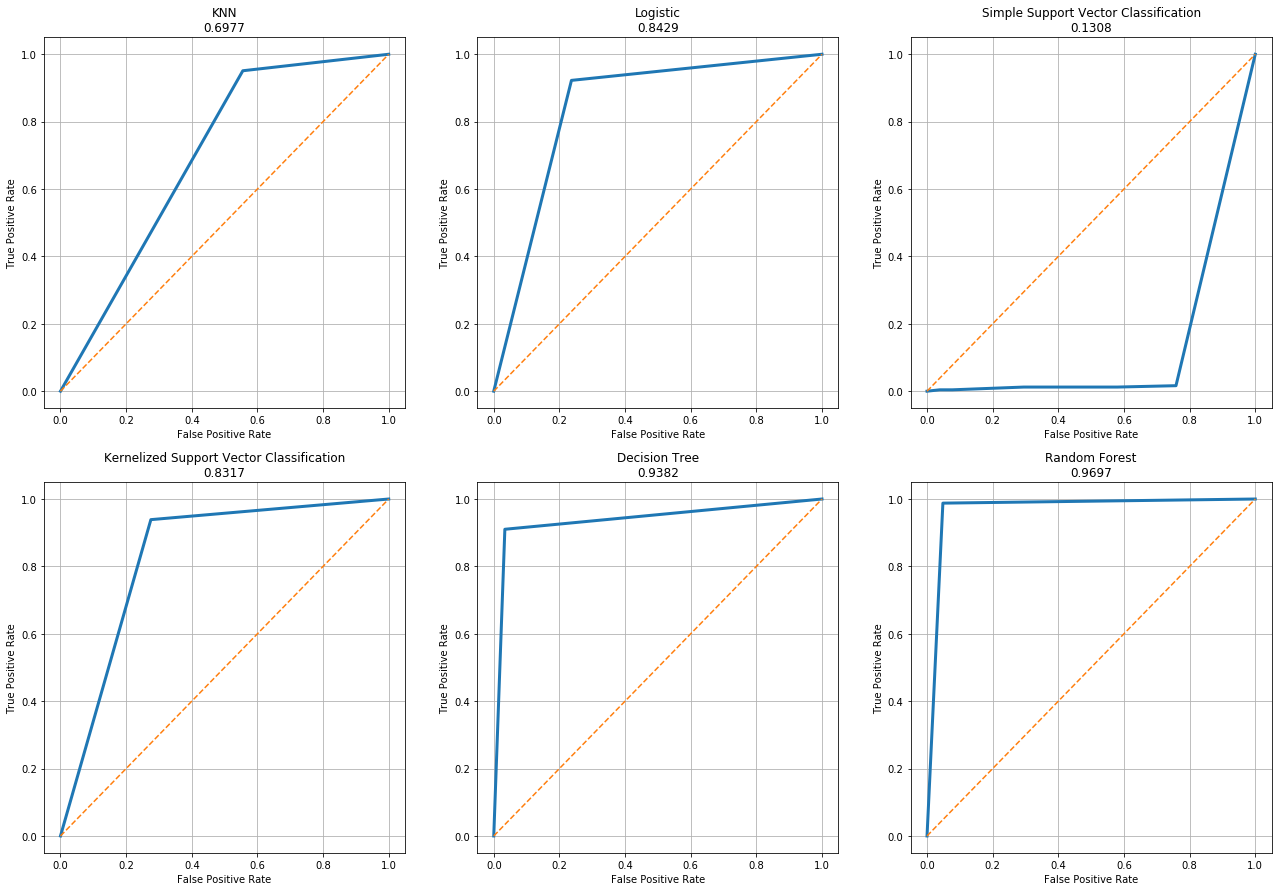

In [84]:
fig, ax = plt.subplots(2, 3, figsize=(22,15))
ax = ax.flatten()
i=0
bagging_binary_train=[]
bagging_binary_test=[]
for name, model in models_binary2:
    predicted=model.predict(Xbag_mms)
    fpr, tpr,_=roc_curve(y_binary, predicted)
    roc=auc(fpr, tpr)
    bagging_binary_train.append(model.score(Xbag_mms, y_binary))
    bagging_binary_test.append(model.oob_score_)
    print(name, 'AUC: {:.4f}'.format(roc))
    title=name+'\n{:.4f}'.format(roc)
    ax[i].plot(fpr, tpr, lw=3)
    ax[i].plot([0, 1], [0, 1],linestyle='--')
    ax[i].grid(True)
    ax[i].set_title(title)
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    i=i+1

In [85]:
models = ['KNN', 'Logistic Regression', 'Linear SVM', 
          'Kernalized SVM', 'Decision Tree', 'Random Forest']
bag_binary = pd.DataFrame([models, bagging_binary_train, bagging_binary_test], 
                         index=['Models' ,'Bag', 'OutofBag'])
bag_binary.T.set_index('Models')

,Bag,OutofBag
Models,,
KNN,0.719027,0.615044
Logistic Regression,0.849558,0.75885
Linear SVM,0.533186,0.670354
Kernalized SVM,0.840708,0.772124
Decision Tree,0.935841,0.80531
Random Forest,0.971239,0.787611


## 6. AdaBoosting

### 6.1 AdaBoosting Logistic Regression

### 6.1.1 AdaBoosting Multi Class Logit

In [86]:
ada_logit=AdaBoostClassifier(base_estimator=logistic, n_estimators=100, 
                             learning_rate = 1.5, algorithm="SAMME.R", random_state=42)
ada_logit.fit(Xtrain_mms, ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.5, n_estimators=100, random_state=42)

In [87]:
print('Accuracy (Train): {:.4f}'.format(ada_logit.score(Xtrain_mms, ytrain)))
print('Accuracy (Test): {:.4f}'.format(ada_logit.score(Xtest_mms, ytest)))
print(classification_report(ytest, ada_logit.predict(Xtest_mms)))

Accuracy (Train): 0.7147
Accuracy (Test): 0.6484
             precision    recall  f1-score   support

          1       0.77      0.78      0.77        55
          2       0.46      0.55      0.50        11
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      0.67      0.80         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         10       0.43      0.60      0.50         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.64      0.65      0.64        91



### 6.1.2 AdaBoosting Binary Class Logit

In [88]:
ada_logit_binary=AdaBoostClassifier(base_estimator=logistic_binary, 
                                    learning_rate = 1, n_estimators=100, algorithm="SAMME.R", random_state=42)
ada_logit_binary.fit(Xtrain_binary_mms, ytrain_binary)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1, n_estimators=100, random_state=42)

In [89]:
print('Accuracy (Train): {:.4f}'.format(ada_logit_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy (Test): {:.4f}'.format(ada_logit_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, ada_logit_binary.predict(Xtest_binary_mms)))

Accuracy (Train): 0.8227
Accuracy (Test): 0.7802
             precision    recall  f1-score   support

          0       0.71      0.75      0.73        36
          1       0.83      0.80      0.81        55

avg / total       0.78      0.78      0.78        91



### 6.2 AdaBoosting Linear SVC

### 6.2.1 AdaBoosting Multi Class Linear SVC

In [90]:
ada_linearSVC=AdaBoostClassifier(base_estimator=linearSVC, learning_rate = 1,
                                 n_estimators=100, algorithm="SAMME", random_state=42)
ada_linearSVC.fit(Xtrain_mms, ytrain)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1, n_estimators=100, random_state=42)

In [91]:
print('Accuracy (Train): {:.4f}'.format(ada_linearSVC.score(Xtrain_mms, ytrain)))
print('Accuracy (Test): {:.4f}'.format(ada_linearSVC.score(Xtest_mms, ytest)))
print(classification_report(ytest, ada_linearSVC.predict(Xtest_mms)))

Accuracy (Train): 0.5263
Accuracy (Test): 0.6044
             precision    recall  f1-score   support

          1       0.60      1.00      0.75        55
          2       0.00      0.00      0.00        11
          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.37      0.60      0.46        91



### 6.2.2 AdaBoosting Binary Class Linear SVC

In [92]:
ada_linearSVC_binary=AdaBoostClassifier(base_estimator=linearSVC_binary, learning_rate = 1,
                                        n_estimators=100, algorithm="SAMME", random_state=42)
ada_linearSVC_binary.fit(Xtrain_binary_mms, ytrain_binary)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1, n_estimators=100, random_state=42)

In [93]:
print('Accuracy (Train): {:.4f}'.format(ada_linearSVC_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy (Test): {:.4f}'.format(ada_linearSVC_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, ada_linearSVC_binary.predict(Xtest_binary_mms)))

Accuracy (Train): 0.5263
Accuracy (Test): 0.6044
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        36
          1       0.60      1.00      0.75        55

avg / total       0.37      0.60      0.46        91



### 6.3 AdaBoosting Kernelized SVC

### 6.3.1 AdaBoosting Multi Class Kernelized SVC

In [94]:
ada_kernelizedSVC=AdaBoostClassifier(base_estimator=kernelizedSVC,learning_rate= 1,
                                     n_estimators=100, algorithm="SAMME", random_state=42)
ada_kernelizedSVC.fit(Xtrain_mms, ytrain)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1, n_estimators=100, random_state=42)

In [95]:
print('Accuracy (Train): {:.4f}'.format(ada_kernelizedSVC.score(Xtrain_mms, ytrain)))
print('Accuracy (Test): {:.4f}'.format(ada_kernelizedSVC.score(Xtest_mms, ytest)))
print(classification_report(ytest, ada_kernelizedSVC.predict(Xtest_mms)))

Accuracy (Train): 0.5263
Accuracy (Test): 0.6044
             precision    recall  f1-score   support

          1       0.60      1.00      0.75        55
          2       0.00      0.00      0.00        11
          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.37      0.60      0.46        91



### 6.3.2 AdaBoosting Binary Class Kernelized SVC

In [96]:
ada_kernelizedSVC_binary=AdaBoostClassifier(base_estimator=kernelizedSVC_binary,learning_rate= 1,
                                            n_estimators=100, algorithm="SAMME", random_state=42)
ada_kernelizedSVC_binary.fit(Xtrain_binary_mms, ytrain_binary)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1, n_estimators=100, random_state=42)

In [97]:
print('Accuracy (Train): {:.4f}'.format(ada_kernelizedSVC_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy (Test): {:.4f}'.format(ada_kernelizedSVC_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, ada_kernelizedSVC_binary.predict(Xtest_binary_mms)))

Accuracy (Train): 0.5263
Accuracy (Test): 0.6044
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        36
          1       0.60      1.00      0.75        55

avg / total       0.37      0.60      0.46        91



### 6.4 AdaBoosting Decision Tree

### 6.4.1 AdaBoosting Multi Class Decision Tree

In [98]:
ada_tree=AdaBoostClassifier(base_estimator=tree, learning_rate = 1,
                            n_estimators=100, 
                            algorithm="SAMME.R", random_state=42)

ada_tree.fit(Xtrain_mms, ytrain)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=100, random_state=42)

In [99]:
print('Accuracy (Train): {:.4f}'.format(ada_tree.score(Xtrain_mms, ytrain)))
print('Accuracy (Test): {:.4f}'.format(ada_tree.score(Xtest_mms, ytest)))
print(classification_report(ytest_binary, ada_tree.predict(Xtest_mms)))

Accuracy (Train): 1.0000
Accuracy (Test): 0.7363
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        36
          1       0.74      0.95      0.83        55
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
         10       0.00      0.00      0.00         0

avg / total       0.45      0.57      0.50        91



### 6.4.2 AdaBoosting Binary Class Decision Tree

In [100]:
ada_tree_binary=AdaBoostClassifier(base_estimator=tree_binary, 
                                   n_estimators=100, random_state=42, learning_rate=0.5)

ada_tree_binary.fit(Xtrain_binary_mms, ytrain_binary)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=42)

In [101]:
print('Accuracy (Train): {:.4f}'.format(ada_tree_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy (Test): {:.4f}'.format(ada_tree_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, ada_tree_binary.predict(Xtest_binary_mms)))

Accuracy (Train): 1.0000
Accuracy (Test): 0.7692
             precision    recall  f1-score   support

          0       0.68      0.78      0.73        36
          1       0.84      0.76      0.80        55

avg / total       0.78      0.77      0.77        91



### 6.5 AdaBoosting Random Forest

### 6.5.1 AdaBoosting Multi Class Random Forest

In [102]:
ada_RandomForest=AdaBoostClassifier(base_estimator=randomforest,learning_rate = 1,
                                    n_estimators=50, algorithm="SAMME.R", random_state=42)

ada_RandomForest.fit(Xtrain_mms, ytrain)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1, n_estimators=50, random_state=42)

In [103]:
print('Accuracy (Train): {:.4f}'.format(ada_RandomForest.score(Xtrain_mms, ytrain)))
print('Accuracy (Test): {:.4f}'.format(ada_RandomForest.score(Xtest_mms, ytest)))
print(classification_report(ytest, ada_RandomForest.predict(Xtest_mms)))

Accuracy (Train): 1.0000
Accuracy (Test): 0.6923
             precision    recall  f1-score   support

          1       0.77      0.87      0.82        55
          2       0.43      0.55      0.48        11
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      0.33      0.50         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         10       0.33      0.60      0.43         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.64      0.69      0.65        91



### 6.5.2 AdaBoosting Binary Class Random Forest

In [104]:
ada_RandomForest_binary=AdaBoostClassifier(base_estimator=randomforest_binary,learning_rate = 0.5,
                                           n_estimators=50, algorithm="SAMME.R", random_state=42)

ada_RandomForest_binary.fit(Xtrain_binary_mms, ytrain_binary)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=0.5, n_estimators=50, random_state=42)

In [105]:
print('Accuracy (Train): {:.4f}'.format(ada_RandomForest_binary.score(Xtrain_binary_mms, ytrain_binary)))
print('Accuracy (Test): {:.4f}'.format(ada_RandomForest_binary.score(Xtest_binary_mms, ytest_binary)))
print(classification_report(ytest_binary, ada_RandomForest_binary.predict(Xtest_binary_mms)))

Accuracy (Train): 1.0000
Accuracy (Test): 0.7802
             precision    recall  f1-score   support

          0       0.75      0.67      0.71        36
          1       0.80      0.85      0.82        55

avg / total       0.78      0.78      0.78        91



### 6.6 Model Comparison AdaBoosting models

### 6.6.1 Comparison  Multi Class AdaBoosting

In [106]:
models3=[]
# models2.append(('KNN', bag_knn))
models3.append(('Logistic', ada_logit))
models3.append(('Simple Support Vector Classification', ada_linearSVC))
models3.append(('Kernelized Support Vector Classification', ada_kernelizedSVC))
models3.append(('Decision Tree', ada_tree))
models3.append(('Random Forest', ada_RandomForest))

Logistic accuracy : 0.6484
Simple Support Vector Classification accuracy : 0.6044
Kernelized Support Vector Classification accuracy : 0.6044
Decision Tree accuracy : 0.7363
Random Forest accuracy : 0.6923


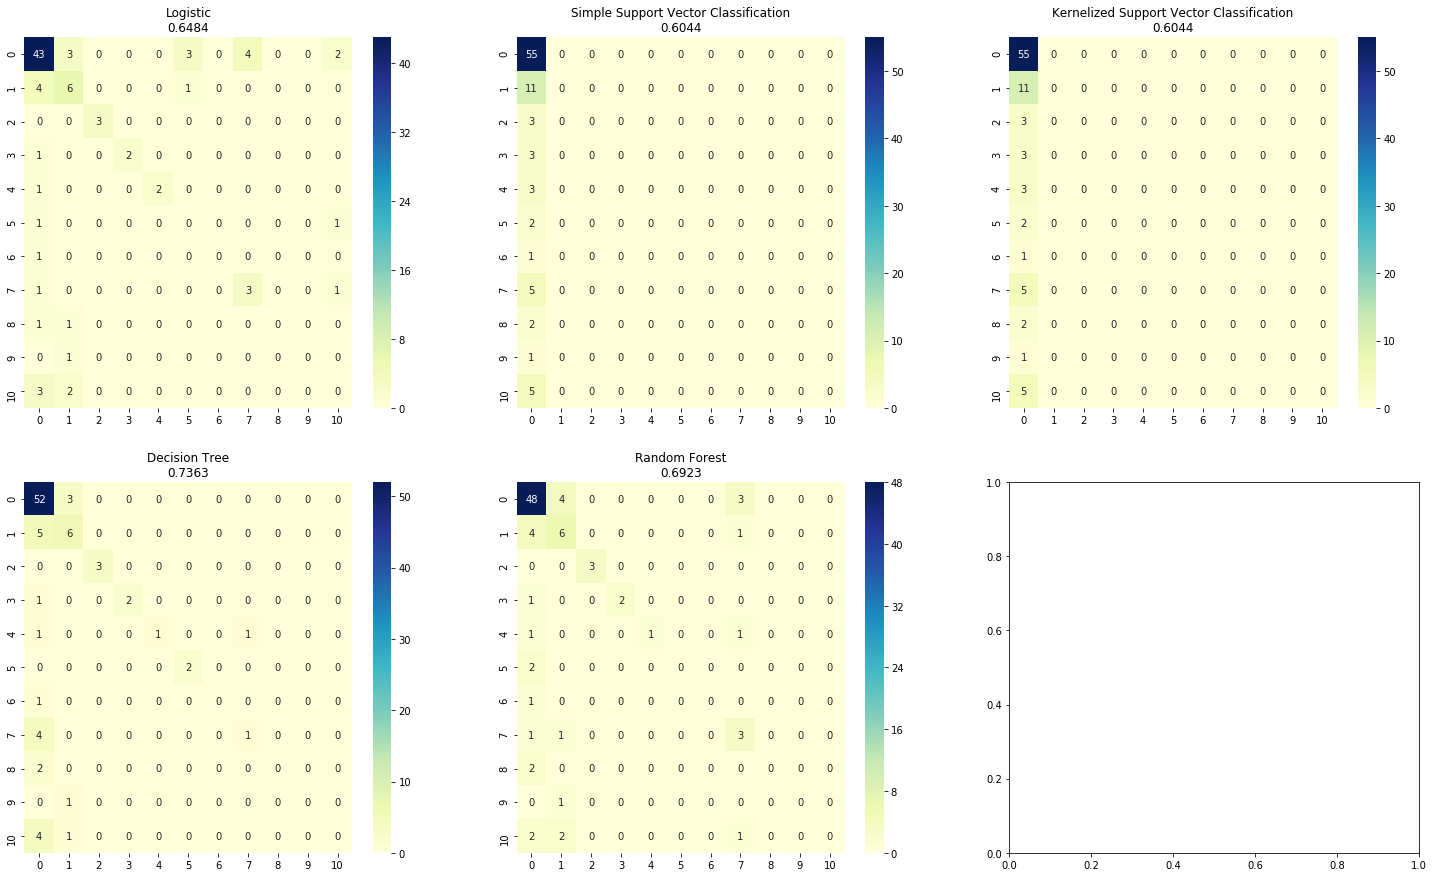

In [107]:
fig, ax = plt.subplots(2, 3, figsize=(25,15))
ax = ax.flatten()
i=0
adaboosting_milti = []
for name, model in models3:
    predicted=model.predict(Xtest_mms)
    title=name+'\n{:.4f}'.format(model.score(Xtest_mms, ytest))
    print(name+' accuracy : {:.4f}'.format(model.score(Xtest_mms, ytest)))
    #list
    adaboosting_milti.append(model.score(Xtest_mms, ytest))
    a=confusion_matrix(ytest, predicted)
    df_cm = pd.DataFrame(a)
    sns.heatmap(a, annot=True, fmt="d", ax=ax[i], cmap="YlGnBu")
    ax[i].set_title(title)
    i=i+1

In [108]:
adaboosting_milti.insert(0, 0)
# adaboosting_milti

### 6.6.2 Comparison  Binary Class AdaBoosting

In [109]:
models_binary3=[]
# models2.append(('KNN', bag_knn))
models_binary3.append(('Logistic', ada_logit_binary))
models_binary3.append(('Simple Support Vector Classification', ada_linearSVC_binary))
models_binary3.append(('Kernelized Support Vector Classification', ada_kernelizedSVC_binary))
models_binary3.append(('Decision Tree', ada_tree_binary))
models_binary3.append(('Random Forest', ada_RandomForest_binary))

Logistic 0.7750
Simple Support Vector Classification 0.5000
Kernelized Support Vector Classification 0.5000
Decision Tree 0.7707
Random Forest 0.7606


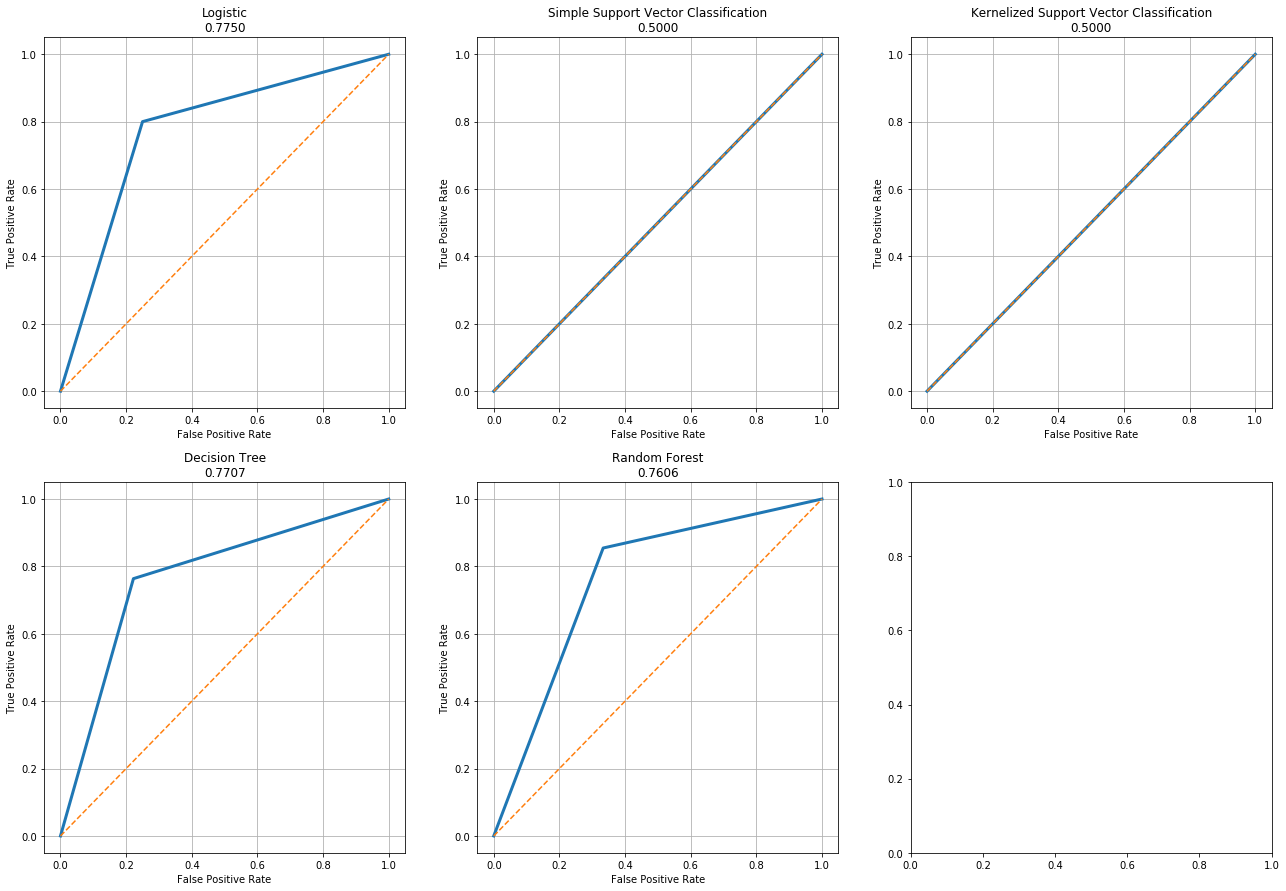

In [110]:
fig, ax = plt.subplots(2, 3, figsize=(22,15))
ax = ax.flatten()
i=0
adaboosting_binary = []
for name, model in models_binary3:
    predicted=model.predict(Xtest_binary_mms)
    fpr, tpr,_=roc_curve(ytest_binary, predicted)
    roc=auc(fpr, tpr)
    #list
    adaboosting_binary.append(model.score(Xtest_binary_mms, ytest_binary))
    print(name, '{:.4f}'.format(roc))
    title=name+'\n{:.4f}'.format(roc)
    ax[i].plot(fpr, tpr, lw=3)
    ax[i].plot([0, 1], [0, 1],linestyle='--')
    ax[i].grid(True)
    ax[i].set_title(title)
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    i=i+1

In [111]:
adaboosting_binary.insert(0, 0)
# adaboosting_binary

## 7. Gradient Boosting

### 7.1 Gradientboosting Multi Class

In [112]:
model = GradientBoostingClassifier(random_state=10, min_samples_split = 5)
param_grid={"learning_rate":[0.01, 0.1, 0.2, 0.3],
           "n_estimators":[50, 60, 70, 80]}
k=KFold(n_splits=5, random_state= 10)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", cv=k)
grid_result = grid_search.fit(Xtrain_mms, ytrain)

In [113]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.736842 using {'learning_rate': 0.3, 'n_estimators': 60}


In [114]:
gradboost = GradientBoostingClassifier(learning_rate=0.3, n_estimators = 60, min_samples_split =5, random_state=10).fit(Xtrain_mms, ytrain)
gradboost.score(Xtest_mms, ytest)
print('{:.4f}'.format(gradboost.score(Xtest_mms, ytest)))

0.6813


In [115]:
y_prediction=gradboost.predict(Xtest_mms)
print(classification_report(ytest, y_prediction))

             precision    recall  f1-score   support

          1       0.85      0.82      0.83        55
          2       0.50      0.45      0.48        11
          3       1.00      0.67      0.80         3
          4       1.00      0.33      0.50         3
          5       0.67      0.67      0.67         3
          6       0.50      1.00      0.67         2
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         1
         10       0.36      0.80      0.50         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.33      0.20      0.25         5

avg / total       0.71      0.68      0.68        91



### 7.2 Gradientboosting Binary Class

In [116]:
model_gbinary = GradientBoostingClassifier(random_state=10)
param_grid={"learning_rate":[0.01, 0.1, 0.2, 0.3],
           "n_estimators":[50, 60, 70, 80]}
k=KFold(n_splits=5, random_state= 10)
grid_search = GridSearchCV(model_gbinary, param_grid, scoring="accuracy", cv=k)
grid_result = grid_search.fit(Xtrain_binary_mms, ytrain_binary)

In [117]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.839335 using {'learning_rate': 0.2, 'n_estimators': 60}


In [118]:
gradboost_binary = GradientBoostingClassifier(learning_rate=0.2, n_estimators = 50, random_state=10).fit(Xtrain_mms, ytrain_binary)
print('{:.4f}'.format(gradboost_binary.score(Xtest_mms, ytest_binary)))

0.7802


In [119]:
y_prediction=gradboost_binary.predict(Xtest_binary_mms)
print(classification_report(ytest_binary, y_prediction))

             precision    recall  f1-score   support

          0       0.72      0.72      0.72        36
          1       0.82      0.82      0.82        55

avg / total       0.78      0.78      0.78        91



## 8. Voting Classifier

### 8.1 Voting for Multiclass

In [120]:
voting_clf = VotingClassifier(estimators=[('knn', knn), ('logit', logistic), ('svc_linear', linearSVC),  
                                           ('svc_kernel', kernelizedSVC), ('rf', randomforest),], 
                              voting='hard')

In [121]:
voting_multi=[]
for clf in (knn, logistic, linearSVC, kernelizedSVC, randomforest, voting_clf):
    clf.fit(Xtrain, ytrain)
    y_pred = clf.predict(Xtest)
    print(clf.__class__.__name__, accuracy_score(ytest, y_pred))
    voting_multi.append(accuracy_score(ytest, y_pred))

KNeighborsClassifier 0.692307692308
LogisticRegression 0.681318681319
SVC 0.703296703297
SVC 0.681318681319
RandomForestClassifier 0.714285714286
VotingClassifier 0.736263736264


* For multi calss data set, the voting classifier performances much better than any one certain model.

### 8.2 Voting for Binary Class

In [122]:
voting_clf_binary = VotingClassifier(estimators=[('knn_binary', knn_binary), ('logit_binary', logistic_binary), 
                                          ('svc_linear_binary', linearSVC_binary),  ('svc_kernel_binary', kernelizedSVC_binary ), 
                                          ('rf_binary', randomforest_binary)], 
                              voting='hard')
voting_clf_binary.fit(Xtrain_mms, ytrain_binary)

VotingClassifier(estimators=[('knn_binary', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('logit_binary', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          inter...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [123]:
voting_binary=[]
for clf_binary in (knn_binary, logistic_binary, linearSVC_binary, kernelizedSVC_binary, randomforest_binary, 
                   voting_clf_binary):
    clf_binary.fit(Xtrain_mms, ytrain_binary)
    y_pred_binary = clf_binary.predict(Xtest_binary_mms)
    print(clf_binary.__class__.__name__, accuracy_score(ytest_binary, y_pred_binary))
    voting_binary.append(accuracy_score(ytest_binary, y_pred_binary))

KNeighborsClassifier 0.615384615385
LogisticRegression 0.736263736264
SVC 0.725274725275
SVC 0.758241758242
RandomForestClassifier 0.758241758242
VotingClassifier 0.736263736264


## 9. Modeling with Dimension Reduction

### 9.1 Defining the number of principal components

In [124]:
pca_number = pd.DataFrame(columns=['Principle Components', 'Explained Variance', 'Binary(Test)', 'Multi(Test)'])
index=0
for i in list(range(2, 278))[::5]:
    #PCA
    pca=PCA(n_components=i)
    pca.fit(Xtrain_mms)
    Xtrain_pca=pca.transform(Xtrain_mms)
    Xtest_pca=pca.transform(Xtest_mms)
    variance=pca.explained_variance_ratio_.sum()
        
    #multi class KNN
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(Xtrain_pca, ytrain)
    prediction=knn.predict(Xtest_pca)
    multi=accuracy_score(ytest, prediction)
    
    #Binary classKNN
    knn_binary=KNeighborsClassifier(n_neighbors=5)
    knn_binary.fit(Xtrain_pca, ytrain_binary)
    prediction_binary=knn_binary.predict(Xtest_pca)
    binary=accuracy_score(ytest_binary, prediction_binary)
    
    pca_number.loc[index]=[i,variance,binary,multi]
    index=index+1

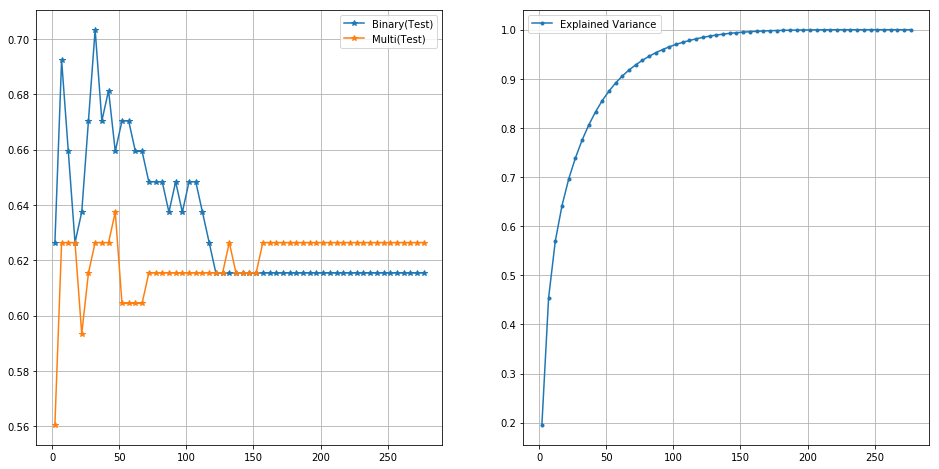

In [125]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].plot('Principle Components', 'Binary(Test)','*-',data=pca_number)
ax[0].plot('Principle Components', 'Multi(Test)','*-',data=pca_number)
ax[0].grid(True)
ax[0].legend()

ax[1].plot('Principle Components', 'Explained Variance','.-',data=pca_number)
ax[1].grid(True)
ax[1].legend()

#### When the number of principle components equal to 32, the KNN model preformances well. So we can use the first 32 principle components as features.

In [126]:
pca=PCA(n_components=32)
pca.fit(Xtrain_mms)
Xtrain_pca=pca.transform(Xtrain_mms)
Xtest_pca=pca.transform(Xtest_mms)
print('The percent of preserving variance is :{:.2f} %'.format(pca.explained_variance_ratio_.sum()*100))

The percent of preserving variance is :77.54 %


### 9.2 Knearest Neighbor Classifier with PCA

### 9.2.1  Multi class KNN with PCA

#### Grid Search for Multiclass-knn PCA

In [127]:
#Setting the parameters
knearest_grid_pca=KNeighborsClassifier()
neighbors=[i for i in range(1, 15, 2)]
kparam_grid_pca={"n_neighbors":neighbors}
grid_Kneighbors_pca=GridSearchCV(knearest_grid_pca, kparam_grid_pca, cv=5)

#Fitting
grid_Kneighbors_pca.fit(Xtrain_pca, ytrain)

#Printing reports
print("Best K: {}".format(grid_Kneighbors_pca.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_Kneighbors_pca.best_score_))
print("Best estimator:\n{}".format(grid_Kneighbors_pca.best_estimator_))

Best K: {'n_neighbors': 7}
Best cross-validation R square: 0.6039
Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')


#### K-NN multiclass model PCA with best parameters

In [128]:
knnmodel_pca=KNeighborsClassifier(n_neighbors=7)
knnmodel_pca.fit(Xtrain_pca, ytrain)
yknn_test_predict_pca=knnmodel_pca.predict(Xtest_pca)

print('Accuracy (training): {:.4f}'.format(knnmodel_pca.score(Xtrain_pca, ytrain)))
print('Accuracy (test): {:.4f}'.format(knnmodel_pca.score(Xtest_pca, ytest)))

print(classification_report(ytest, yknn_test_predict_pca))

Accuracy (training): 0.6316
Accuracy (test): 0.6264
             precision    recall  f1-score   support

          1       0.62      1.00      0.76        55
          2       0.00      0.00      0.00        11
          3       1.00      0.67      0.80         3
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.41      0.63      0.49        91



### 9.2.2  Binary class KNN with PCA

#### Grid Search for Binary class-knn PCA

In [129]:
#Setting the parameters
knearest_grid_pca=KNeighborsClassifier()
neighbors=[i for i in range(1, 15, 2)]
kparam_grid_pca={"n_neighbors":neighbors}
grid_Kneighbors_pca_binary=GridSearchCV(knearest_grid_pca, kparam_grid_pca, cv=5)

#Fitting
grid_Kneighbors_pca_binary.fit(Xtrain_pca, ytrain_binary)

#Printing reports
print("Best K: {}".format(grid_Kneighbors_pca_binary.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_Kneighbors_pca_binary.best_score_))
print("Best estimator:\n{}".format(grid_Kneighbors_pca_binary.best_estimator_))

Best K: {'n_neighbors': 5}
Best cross-validation R square: 0.6759
Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


#### K-NN PCA binary class model with best parameters

In [130]:
knnmodel_pca_binary=KNeighborsClassifier(n_neighbors=5)
knnmodel_pca_binary.fit(Xtrain_pca, ytrain_binary)

yknn_test_predict_pca=knnmodel_pca_binary.predict(Xtest_pca)

print('Accuracy (training): {:.4f}'.format(knnmodel_pca_binary.score(Xtrain_pca, ytrain_binary)))
print('Accuracy (test): {:.4f}'.format(knnmodel_pca_binary.score(Xtest_pca, ytest_binary)))

print(classification_report(ytest_binary, yknn_test_predict_pca))

Accuracy (training): 0.7729
Accuracy (test): 0.7033
             precision    recall  f1-score   support

          0       0.76      0.36      0.49        36
          1       0.69      0.93      0.79        55

avg / total       0.72      0.70      0.67        91



### 9.3 Logistic Classifier with PCA

### 9.3.1 Multiclass Logistic Regression with PCA

#### Grid Search for Multi class-logit PCA

In [131]:
#Setting the parameters
aux_logistic_pca=LogisticRegression()
logitparam_pca={"C":[0.1,1,5,10,15,20]}
grid_logit_pca=GridSearchCV(aux_logistic_pca, logitparam, cv=5)

#Fitting
grid_logit_pca.fit(Xtrain_pca, ytrain)

#Printing reports
print("Best K: {}".format(grid_logit_pca.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_logit_pca.best_score_))
print("Best estimator:\n{}".format(grid_logit_pca.best_estimator_))

Best K: {'C': 15}
Best cross-validation R square: 0.7258
Best estimator:
LogisticRegression(C=15, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


#### Logit PCA multiclass model with best parameters

In [132]:
logitmodel_pca=LogisticRegression(C=15)
logitmodel_pca.fit(Xtrain_pca, ytrain)

ylogistic_test_predict_pca=logitmodel_pca.predict(Xtest_pca)

print('Accuracy (training): {:.4f}'.format(logitmodel_pca.score(Xtrain_pca, ytrain)))
print('Score (test): {:.4f}'.format(logitmodel_pca.score(Xtest_pca, ytest)))

print(classification_report(ytest, ylogistic_test_predict_pca))

Accuracy (training): 0.8144
Score (test): 0.7253
             precision    recall  f1-score   support

          1       0.83      0.87      0.85        55
          2       0.50      0.55      0.52        11
          3       1.00      1.00      1.00         3
          4       1.00      1.00      1.00         3
          5       1.00      0.33      0.50         3
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         1
         10       0.36      0.80      0.50         5
         14       1.00      0.50      0.67         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.70      0.73      0.70        91



### 9.3.2 Binary Class Logistic Regression with PCA

#### Grid Search for Binary class-logit PCA

In [133]:
#Setting the parameters
aux_logistic_pca_binary=LogisticRegression()
logitparam_pca={"C":[0.1,1,5,10,15,20]}
grid_logit_pca_binary=GridSearchCV(aux_logistic_pca_binary, logitparam, cv=5)

#Fitting
grid_logit_pca_binary.fit(Xtrain_pca, ytrain_binary)

#Printing reports
print("Best K: {}".format(grid_logit_pca_binary.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_logit_pca_binary.best_score_))
print("Best estimator:\n{}".format(grid_logit_pca_binary.best_estimator_))

Best K: {'C': 10}
Best cross-validation R square: 0.7645
Best estimator:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


#### Logit PCA  binary class model with best parameters

In [134]:
logitmodel_pca_binary=LogisticRegression(C=10)
logitmodel_pca_binary.fit(Xtrain_pca, ytrain_binary)

ylogistic_test_predict_pca=logitmodel_pca_binary.predict(Xtest_pca)

print('Score (training): {:.4f}'.format(logitmodel_pca_binary.score(Xtrain_pca, ytrain_binary)))
print('Score (test): {:.4f}'.format(logitmodel_pca_binary.score(Xtest_pca, ytest_binary)))

print(classification_report(ytest_binary, ylogistic_test_predict_pca))


Score (training): 0.8033
Score (test): 0.7582
             precision    recall  f1-score   support

          0       0.71      0.67      0.69        36
          1       0.79      0.82      0.80        55

avg / total       0.76      0.76      0.76        91



### 9.4 Linear Support Vector Machine with PCA

### 9.4.1 Multiclass Linear SVC with PCA

#### Grid Search for Multi class-linear SVC PCA

In [135]:
#Setting the parameters
aux_linearSVC_pca=SVC()
linearSVCparam_pca={"kernel":["linear"],
               "C":[1,10,100,1000],
               "gamma":[0.01, 0.1, 0.5, 1]}
grid_linearSVC_pca=GridSearchCV(aux_linearSVC_pca, linearSVCparam_pca, cv=5)

#Fitting
grid_linearSVC_pca.fit(Xtrain_pca, ytrain)

#Print reports
print("Best K: {}".format(grid_linearSVC_pca.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_linearSVC_pca.best_score_))
print("Best estimator:\n{}".format(grid_linearSVC_pca.best_estimator_))


Best K: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best cross-validation R square: 0.7202
Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Linear SVC PCA multiclass model with best parameters

In [136]:
linearSVCmodel_pca=SVC(C=1, gamma=0.01, kernel="linear")
linearSVCmodel_pca.fit(Xtrain_pca, ytrain)

ylinearSVC_test_predict_pca=linearSVCmodel_pca.predict(Xtest_pca)

print('Accuracy (training): {:.4f}'.format(linearSVCmodel_pca.score(Xtrain_pca, ytrain)))
print('Accuracy (test): {:.4f}'.format(linearSVCmodel_pca.score(Xtest_pca, ytest)))

print(classification_report(ytest, ylinearSVC_test_predict_pca))

Accuracy (training): 0.8144
Accuracy (test): 0.7473
             precision    recall  f1-score   support

          1       0.82      0.91      0.86        55
          2       0.50      0.55      0.52        11
          3       1.00      1.00      1.00         3
          4       0.75      1.00      0.86         3
          5       1.00      0.33      0.50         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         10       0.44      0.80      0.57         5
         14       1.00      0.50      0.67         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.69      0.75      0.71        91



### 9.4.2 Binary Class Linear SVC

#### Grid Search for Binary class-linear SVC PCA

In [137]:
#Setting the parameters
aux_linearSVC_pca_binary=SVC()
linearSVCparam_pca={"kernel":["linear"],
               "C":[1,10,100,1000],
               "gamma":[0.01, 0.1, 0.5, 1]}
grid_linearSVC_pca_binary=GridSearchCV(aux_linearSVC_pca_binary, linearSVCparam_pca, cv=5)

#Fitting
grid_linearSVC_pca_binary.fit(Xtrain_pca, ytrain)

#Print reports
print("Best K: {}".format(grid_linearSVC_pca_binary.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_linearSVC_pca_binary.best_score_))
print("Best estimator:\n{}".format(grid_linearSVC_pca_binary.best_estimator_))


Best K: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best cross-validation R square: 0.7202
Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Linear SVC binary class model with best parameters

In [138]:
linearSVCmodel_pca_binary=SVC(C=1, gamma=0.01, kernel="linear")
linearSVCmodel_pca_binary.fit(Xtrain_pca, ytrain_binary)

ylinearSVC_test_predict_pca=linearSVCmodel_pca_binary.predict(Xtest_pca)

print('Accuracy (training): {:.4f}'.format(linearSVCmodel_pca_binary.score(Xtrain_pca, ytrain)))
print('Accuracy (test): {:.4f}'.format(linearSVCmodel_pca_binary.score(Xtest_pca, ytest_binary)))

print(classification_report(ytest_binary, ylinearSVC_test_predict_pca))

Accuracy (training): 0.4820
Accuracy (test): 0.7692
             precision    recall  f1-score   support

          0       0.71      0.69      0.70        36
          1       0.80      0.82      0.81        55

avg / total       0.77      0.77      0.77        91



### 9.5 Kernelized Support Vector Machine with PCA

### 9.5.1 Multiclass Kernelized Support Vector Machine PCA

#### Grid Search for Multi class-kernelized SVC PCA

In [139]:
#Setting the parameters
aux_kernelizedSVC_pca=SVC()
kernelizedSVCparam_pca={"kernel":["rbf", "poly"],
               "C":[1,10,100,1000],
               "gamma":[0.01, 0.1, 0.5, 1]}
grid_kernelizedSVC_pca=GridSearchCV(aux_kernelizedSVC_pca, kernelizedSVCparam_pca, cv=5)

#Fitting
grid_kernelizedSVC_pca.fit(Xtrain_pca, ytrain)

#Print reports
print("Best K: {}".format(grid_kernelizedSVC_pca.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_kernelizedSVC_pca.best_score_))
print("Best estimator:\n{}".format(grid_kernelizedSVC_pca.best_estimator_))

Best K: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation R square: 0.7202
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [140]:
kernelizedSVCmodel_pca=SVC(C=100, gamma=0.01, kernel="rbf")
kernelizedSVCmodel_pca.fit(Xtrain_pca, ytrain)

ykernelizedSVC_test_predict_pca=kernelizedSVCmodel_pca.predict(Xtest_pca)

print('Score (training): {:.4f}'.format(kernelizedSVCmodel_pca.score(Xtrain_pca, ytrain)))
print('Score (test): {:.4f}'.format(kernelizedSVCmodel_pca.score(Xtest_pca, ytest)))
print(classification_report(ytest, ykernelizedSVC_test_predict_pca))

Score (training): 0.8587
Score (test): 0.7363
             precision    recall  f1-score   support

          1       0.80      0.87      0.83        55
          2       0.54      0.64      0.58        11
          3       1.00      1.00      1.00         3
          4       1.00      1.00      1.00         3
          5       1.00      0.33      0.50         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         10       0.40      0.80      0.53         5
         14       1.00      0.50      0.67         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.69      0.74      0.70        91



### 9.5.2 Binary Class Kernelized SVC PCA

#### Grid Search for Binary class-kernelizedSVC PCA

In [141]:
#Setting the parameters
aux_kernelizedSVC_pca_binary=SVC()
kernelizedSVCparam_pca={"kernel":["rbf", "poly"],
               "C":[1,10,100,1000],
               "gamma":[0.01, 0.1, 0.5, 1]}
grid_kernelizedSVC_pca_binary=GridSearchCV(aux_kernelizedSVC_pca_binary, kernelizedSVCparam_pca, cv=5)

#Fitting
grid_kernelizedSVC_pca_binary.fit(Xtrain_pca, ytrain_binary)

#Print reports
print("Best K: {}".format(grid_kernelizedSVC_pca_binary.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_kernelizedSVC_pca_binary.best_score_))
print("Best estimator:\n{}".format(grid_kernelizedSVC_pca_binary.best_estimator_))

Best K: {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Best cross-validation R square: 0.7729
Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Kernelized SVC PCA binary class model with best parameters

In [142]:
kernelizedSVCmodel_pca_binary=SVC(C=1, gamma=0.5, kernel="rbf")
kernelizedSVCmodel_pca_binary.fit(Xtrain_pca, ytrain_binary)

ykernelizedSVC_test_predict_pca=kernelizedSVCmodel_pca_binary.predict(Xtest_pca)

print('Score (training): {:.4f}'.format(kernelizedSVCmodel_pca_binary.score(Xtrain_pca, ytrain_binary)))
print('Score (test): {:.4f}'.format(kernelizedSVCmodel_pca_binary.score(Xtest_pca, ytest_binary)))
print(classification_report(ytest_binary, ykernelizedSVC_test_predict_pca))

Score (training): 0.9030
Score (test): 0.8132
             precision    recall  f1-score   support

          0       0.77      0.75      0.76        36
          1       0.84      0.85      0.85        55

avg / total       0.81      0.81      0.81        91



### 9.6 Decision Tree with PCA

### 9.6.1 Multiclass DecisionTree PCA

#### Grid Search for Multi class-Decision Tree PCA

In [143]:
#Setting the parameters
aux_tree_pca=DecisionTreeClassifier()
treeparam_pca={"max_depth":[5, 10,15,20]}
grid_tree_pca=GridSearchCV(aux_tree_pca, treeparam_pca, cv=5)

#Fitting
grid_tree_pca.fit(Xtrain_pca, ytrain)

#Print reports
print("Best K: {}".format(grid_tree_pca.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_tree_pca.best_score_))
print("Best estimator:\n{}".format(grid_tree_pca.best_estimator_))

Best K: {'max_depth': 5}
Best cross-validation R square: 0.5180
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### Decision Tree PCA multiclass model with best parameters

In [144]:
treemodel_pca=DecisionTreeClassifier(max_depth=5)
treemodel_pca.fit(Xtrain_pca, ytrain)

ytree_test_predict_pca=treemodel_pca.predict(Xtest_pca)

print('Score (training): {:.4f}'.format(treemodel_pca.score(Xtrain_pca, ytrain)))
print('Score (test): {:.4f}'.format(treemodel_pca.score(Xtest_pca, ytest)))

print(classification_report(ytest, ytree_test_predict_pca))


Score (training): 0.7119
Score (test): 0.6374
             precision    recall  f1-score   support

          1       0.67      0.93      0.78        55
          2       0.38      0.27      0.32        11
          3       1.00      1.00      1.00         3
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         0
         10       0.33      0.20      0.25         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.50      0.64      0.56        91



### 9.6.2 Binary Class Decision Tree

#### Grid Search for Binary class-Decision Tree PCA

In [145]:
#Setting the parameters
aux_tree_pca_binary=DecisionTreeClassifier()
treeparam_pca={"max_depth":[5, 10,15,20]}
grid_tree_pca_binary=GridSearchCV(aux_tree_pca_binary, treeparam_pca, cv=5)

#Fitting
grid_tree_pca_binary.fit(Xtrain_pca, ytrain_binary)

#Print reports
print("Best K: {}".format(grid_tree_pca_binary.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_tree_pca_binary.best_score_))
print("Best estimator:\n{}".format(grid_tree_pca_binary.best_estimator_))

Best K: {'max_depth': 5}
Best cross-validation R square: 0.6260
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### Decision tree binary class PCA model with best parameters

In [146]:
treemodel_pca_binary=DecisionTreeClassifier(max_depth=10)
treemodel_pca_binary.fit(Xtrain_pca, ytrain_binary)

ytree_test_predict_pca_binary=treemodel_pca_binary.predict(Xtest_pca)

print('Score (training): {:.4f}'.format(treemodel_pca_binary.score(Xtrain_pca, ytrain_binary)))
print('Score (test): {:.4f}'.format(treemodel_pca_binary.score(Xtest_pca, ytest_binary)))

print(classification_report(ytest_binary, ytree_test_predict_pca_binary))


Score (training): 1.0000
Score (test): 0.6813
             precision    recall  f1-score   support

          0       0.58      0.69      0.63        36
          1       0.77      0.67      0.72        55

avg / total       0.70      0.68      0.68        91



### 9.7 Random Forest PCA

### 9.7.1 Multiclass Random Forest PCA

#### Grid Search for Multi class-Random Forest PCA

In [147]:
#Setting the parameters
aux_randomforest_pca=RandomForestClassifier(random_state= 10)
randomforestparam_pca={"n_estimators":[10,20,30,50],
           "max_depth":[5, 10,15,20]}
grid_randomforest_pca=GridSearchCV(aux_randomforest_pca, randomforestparam_pca, cv=5)

#Fitting
grid_randomforest_pca.fit(Xtrain_pca, ytrain)

#Print reports
print("Best K: {}".format(grid_randomforest_pca.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_randomforest_pca.best_score_))
print("Best estimator:\n{}".format(grid_randomforest_pca.best_estimator_))

Best K: {'max_depth': 15, 'n_estimators': 50}
Best cross-validation R square: 0.6177
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


#### Random Forest PCA multiclass model with best parameters 

In [148]:
randomforestmodel_pca=RandomForestClassifier(max_depth=15, n_estimators=50)
randomforestmodel_pca.fit(Xtrain_pca, ytrain)

yrandomforest_test_predict_pca=randomforestmodel_pca.predict(Xtest_pca)

print('Accuracy (training): {:.4f}'.format(randomforestmodel_pca.score(Xtrain_pca, ytrain)))
print('Accuracy (test): {:.4f}'.format(randomforestmodel_pca.score(Xtest_pca, ytest)))

print(classification_report(ytest, yrandomforest_test_predict_pca))

Accuracy (training): 0.9972
Accuracy (test): 0.7033
             precision    recall  f1-score   support

          1       0.71      1.00      0.83        55
          2       0.50      0.18      0.27        11
          3       1.00      1.00      1.00         3
          4       1.00      0.33      0.50         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         10       0.60      0.60      0.60         5
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         5

avg / total       0.59      0.70      0.61        91



### 9.7.2 Binary Class Random Forest PCA

#### Grid Search for Binary class-Random Forest PCA

In [149]:
#Setting the parameters
aux_randomforest_pca_binary=RandomForestClassifier(random_state= 10)
randomforestparam_pca={"n_estimators":[10,20,30,50],
           "max_depth":[5, 10,15,20]}
grid_randomforest_pca_binary=GridSearchCV(aux_randomforest_pca_binary, randomforestparam_pca, cv=5)

#Fitting
grid_randomforest_pca_binary.fit(Xtrain_pca, ytrain_binary)

#Print reports
print("Best K: {}".format(grid_randomforest_pca_binary.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_randomforest_pca_binary.best_score_))
print("Best estimator:\n{}".format(grid_randomforest_pca_binary.best_estimator_))

Best K: {'max_depth': 10, 'n_estimators': 50}
Best cross-validation R square: 0.7368
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


#### Random Forest PCA binary class model with best parameters

In [150]:
randomforestmodel_pca_binary=RandomForestClassifier(max_depth=10, n_estimators=50)
randomforestmodel_pca_binary.fit(Xtrain_pca, ytrain_binary)

yrandomforest_test_predict_pca_binary=randomforestmodel_pca_binary.predict(Xtest_pca)

print('Accuracy (train): {:.4f}'.format(randomforestmodel_pca_binary.score(Xtrain_pca, ytrain_binary)))
print('Accuracy (test): {:.4f}'.format(randomforestmodel_pca_binary.score(Xtest_pca, ytest_binary)))

print(classification_report(ytest_binary, yrandomforest_test_predict_pca_binary))

Accuracy (train): 0.9972
Accuracy (test): 0.8132
             precision    recall  f1-score   support

          0       0.76      0.78      0.77        36
          1       0.85      0.84      0.84        55

avg / total       0.81      0.81      0.81        91



### 9.8 Model Comparison PCA

### 9.8.1 Model Comparison Multi Class PCA

In [151]:
models4=[]
models4.append(('KNN', knnmodel_pca))
models4.append(('Logistic', logitmodel_pca))
models4.append(('Simple Support Vector Classification', linearSVCmodel_pca))
models4.append(('Kernelized Support Vector Classification', kernelizedSVCmodel_pca))
models4.append(('Decision Tree', treemodel_pca))
models4.append(('Random Forest', randomforestmodel_pca))

KNN accuracy : 0.6264
Logistic accuracy : 0.7253
Simple Support Vector Classification accuracy : 0.7473
Kernelized Support Vector Classification accuracy : 0.7363
Decision Tree accuracy : 0.6374
Random Forest accuracy : 0.7033


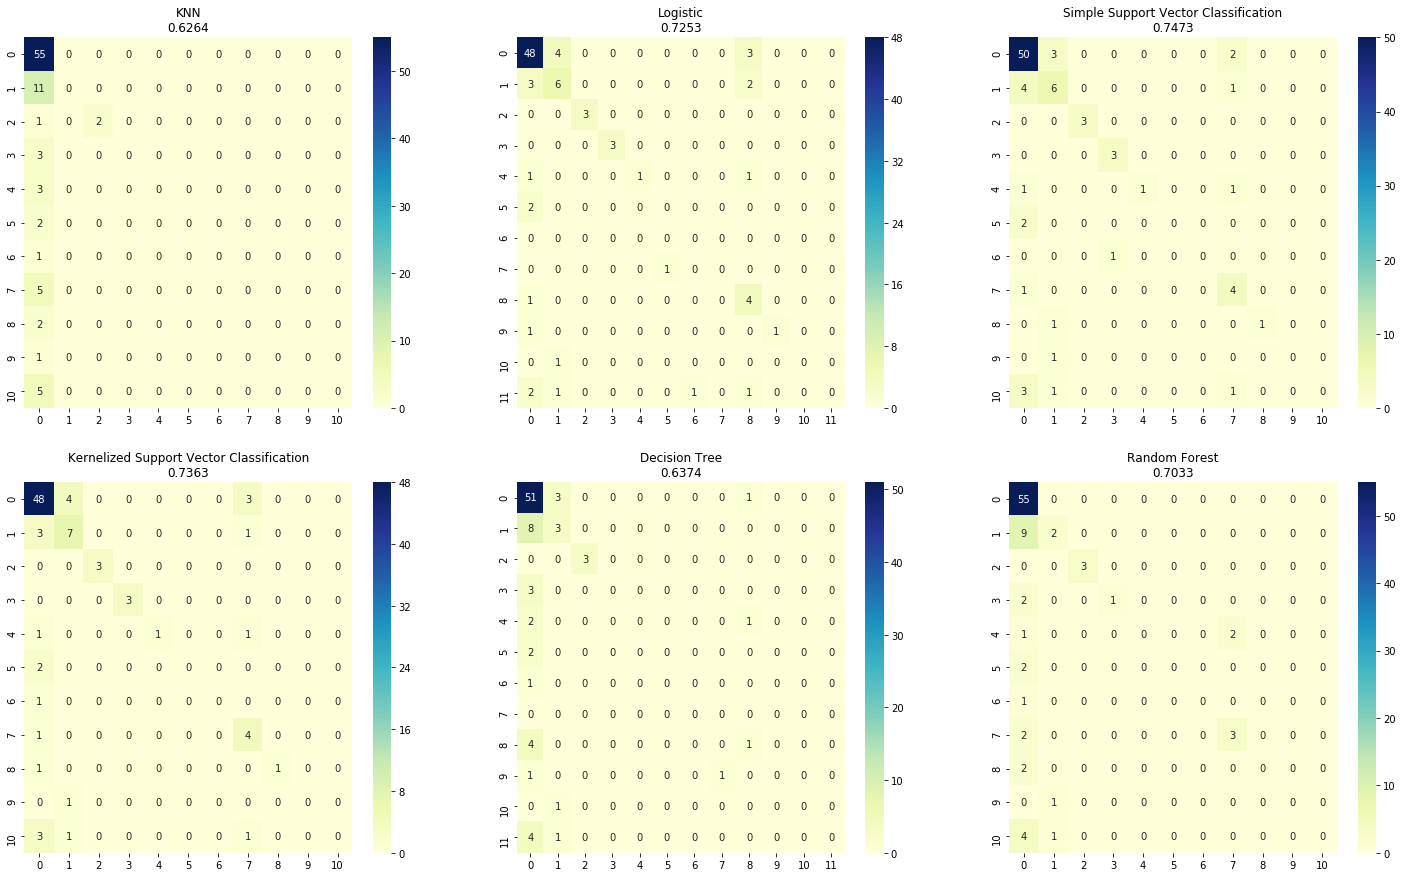

In [152]:
fig, ax = plt.subplots(2, 3, figsize=(25,15))
ax = ax.flatten()
i=0
pca_milti = []
for name, model in models4:
    predicted=model.predict(Xtest_pca)
    title=name+'\n{:.4f}'.format(model.score(Xtest_pca, ytest))
    print(name+' accuracy : {:.4f}'.format(model.score(Xtest_pca, ytest)))
    #list
    pca_milti.append(model.score(Xtest_pca, ytest))
    a=confusion_matrix(ytest, predicted)
    df_cm = pd.DataFrame(a)
    sns.heatmap(a, annot=True, fmt="d", ax=ax[i], cmap="YlGnBu")
    ax[i].set_title(title)
    i=i+1

### 9.8.2 Binary class comparison

In [153]:
models4_binary=[]
models4_binary.append(('KNN', knnmodel_pca_binary))
models4_binary.append(('Logistic', logitmodel_pca_binary))
models4_binary.append(('Simple Support Vector Classification', linearSVCmodel_pca_binary))
models4_binary.append(('Kernelized Support Vector Classification', kernelizedSVCmodel_pca_binary))
models4_binary.append(('Decision Tree', treemodel_pca_binary))
models4_binary.append(('Random Forest', randomforestmodel_pca_binary))

KNN 0.6442
Logistic 0.7424
Simple Support Vector Classification 0.7563
Kernelized Support Vector Classification 0.8023
Decision Tree 0.6836
Random Forest 0.8071


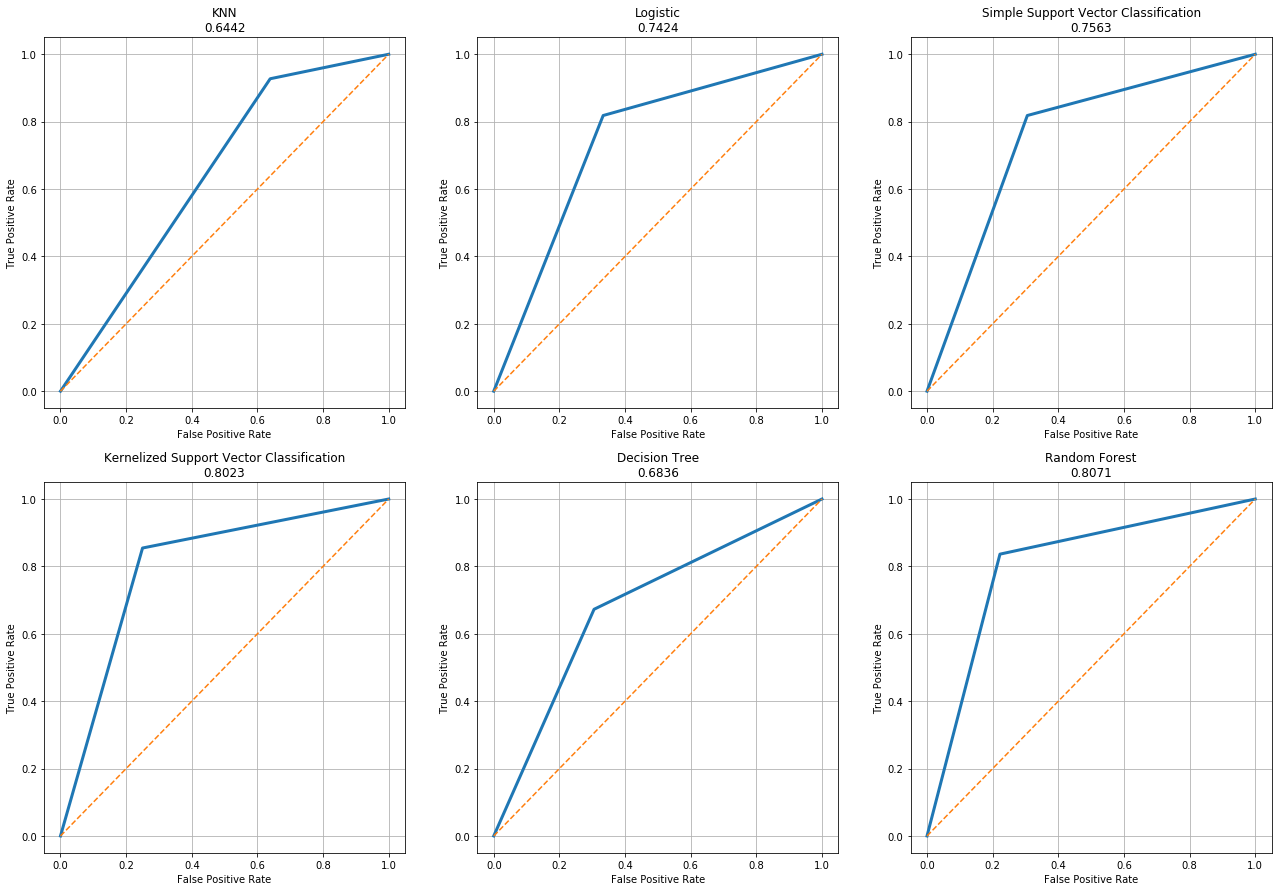

In [154]:
fig, ax = plt.subplots(2, 3, figsize=(22,15))
ax = ax.flatten()
i=0
pca_binary = []
for name, model in models4_binary:
    predicted=model.predict(Xtest_pca)
    fpr, tpr,_=roc_curve(ytest_binary, predicted)
    roc=auc(fpr, tpr)
    #list
    pca_binary.append(model.score(Xtest_pca, ytest_binary))
    print(name, '{:.4f}'.format(roc))
    title=name+'\n{:.4f}'.format(roc)
    ax[i].plot(fpr, tpr, lw=3)
    ax[i].plot([0, 1], [0, 1],linestyle='--')
    ax[i].grid(True)
    ax[i].set_title(title)
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    i=i+1

## 10. Final Reports and Conclusions

In [155]:
method = ['Multi Classes', 'Binary Classes', 'AdaBoosting_milti', 'AdaBoosting_Binary', 'PCA_milti', 'PCA_binary', 
          'Bagging_multi_oob', 'Bagging_binary_oob']
compare = pd.DataFrame([simple_multi, simple_binary, adaboosting_milti, adaboosting_binary, pca_milti, pca_binary,
                       bagging_milti_test, bagging_binary_test], 
                       columns=['KNN', 'logistic Regression', 'SVM_linear', 'SVM_kernel', 'Decision Tree', 'Random Forest'],
                      index = method)
# compare

In [156]:
#Replacing bagging_milti_test "False" with 0
bagging_milti_test[0]=0

#Table for multiclass
method1 = ['Multi_models', 'AdaBoosting_multi', 'PCA_multi','Bagging_multi_oob']
compare_multi = pd.DataFrame([simple_multi, adaboosting_milti, pca_milti,  bagging_milti_test], 
                       columns=['KNN', 'logistic Regression', 'SVM_linear', 'SVM_kernel', 'Decision Tree', 'Random Forest'],
                      index = method1)
tabla1=compare_multi.T

#Table for binary class
method2 = ['Binary_models', 'AdaBoosting_binary', 'PCA_binary','Bagging_binary_oob']
compare_multi = pd.DataFrame([simple_binary, adaboosting_binary, pca_binary,  bagging_binary_test], 
                       columns=['KNN', 'logistic Regression', 'SVM_linear', 'SVM_kernel', 'Decision Tree', 'Random Forest'],
                      index = method2)
tabla2=compare_multi.T

### 10.1 Multiclass Comparative Matrix

Voting Accuracy is: 0.74
Gradient Boosting Accuracy is: 0.68


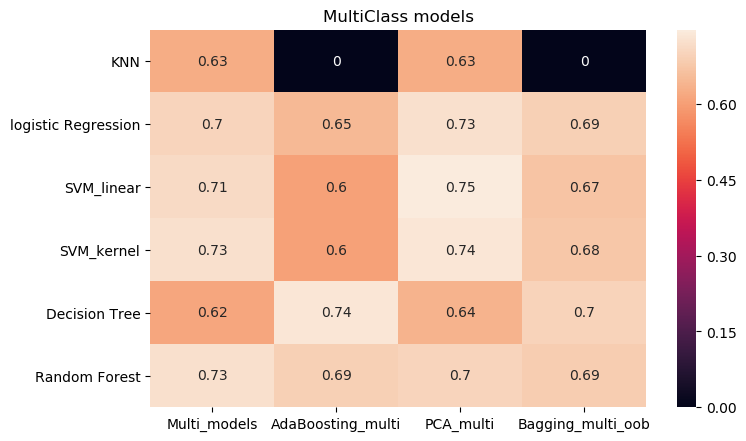

In [157]:
fig = plt.figure(figsize=(8,5), dpi=100)
plt.title("MultiClass models")
sns.heatmap(tabla1, annot=True)

print("Voting Accuracy is: {:.2f}".format(voting_multi[5]))
print("Gradient Boosting Accuracy is: {:.2f}".format(gradboost.score(Xtest_mms, ytest)))



### 10.2 Binaryclass Comparative Matrix

Voting Accuracy is: 0.74
Gradient Boosting Accuracy is: 0.78


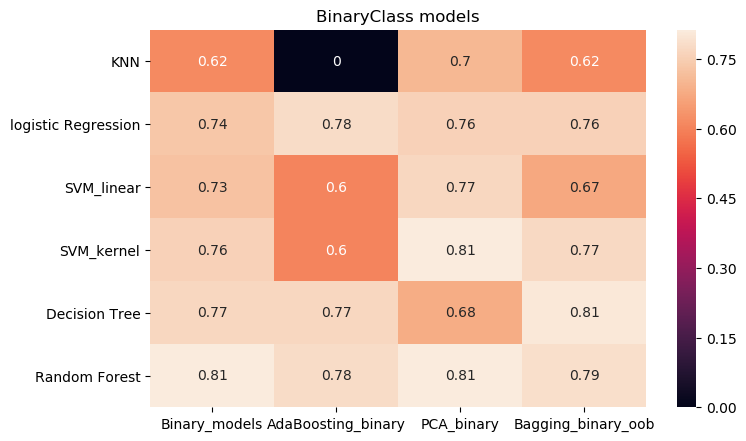

In [158]:
fig = plt.figure(figsize=(8,5), dpi=100)
plt.title("BinaryClass models")
sns.heatmap(tabla2, annot=True)

print("Voting Accuracy is: {:.2f}".format(voting_binary[5]))
print("Gradient Boosting Accuracy is: {:.2f}".format(gradboost_binary.score(Xtest_mms, ytest_binary)))



### 10.3 Final Conclusions

* The best models for multi classification is Decision Tree weighted with AdaBoost.
* For binary class we've found the best models are kernelized SVC (feeded with the first 32 principle components) and Decision Tree with Bagging.

* Since this dataset has a lot of features (279) in proportion of the rows (452), more data could improve the model.
* Also, this is a healthcare industry dataset, the cost of diagnose a patient as normal is dangerous. So it would be useful to refine the classifiers to minimize the false negative rate.


## 11. Effort Table:

* Team Member 1: Minoru Ronny Maeshiro | 100%
* Team Member 2: Lan Wei | 100%